In [1]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-03-02_1842) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl hazard_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

# Fixing the various things for a final figure!
See: Constructing a final probabilistic decoding model.pptx!

<ol> 
<li>Fix error propagation in the bootstrapped model fitting
    <ul>
    <li>Don’t propagate error, just get average error and show this
    </ul>

<li> Add explained deviance to the model report

<li>Timeslice revisions
<ul>
<li>Run on subset (MDT mice) with most trials to ensure we get reliable fits for many timeslices. 

<li>Test all the model permutations and get average AIC, BIC
    
    This is our model selection
</ul>
    

<li>Final model revisions
<ul>
<li>Apply the DA predictors only to get the final model AND EXPLAINED DEVIANCE metrics
<li>Plot hazards with bootstrapped CI
    </ul>
    </ol>

# Before fixing issues: standard nested model, DAHx + DA

-----------------------------------------------
	
Initializing run_collated_model for nestlogit_200hxdst-150_B5TEST
	
Found 2 sessions in /Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions:
1. b5_SNc_13
2. b5_SNc_13_2
	Using only a subset of these sessions:
b5_SNc_13
b5_SNc_13_2
	
-----------------------------------------------
Processing b5_SNc_13...(2021-02-23_1830)
      *---------- (1/2) 02/23/21 18:30:335
	
truncating data back: -0.15s
"     WARNING: The end of baseline is same as begin of LOI on tNo 100 iter=1"
0.0733
0.0733
"     WARNING: NB that we are normalizing history separate from in-trial dopamine..."
Downsampling the no-lick state => using 477=n, the number of first-licks
   *---------- (1/100) 02/23/21 18:30:896
   *=--------- (10/100) 02/23/21 18:31:188
   *==-------- (20/100) 02/23/21 18:31:381
   *===------- (30/100) 02/23/21 18:31:597
   *====------ (40/100) 02/23/21 18:31:781
   *=====----- (50/100) 02/

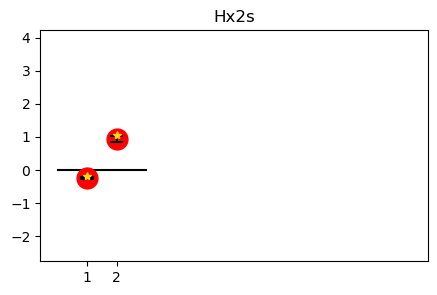

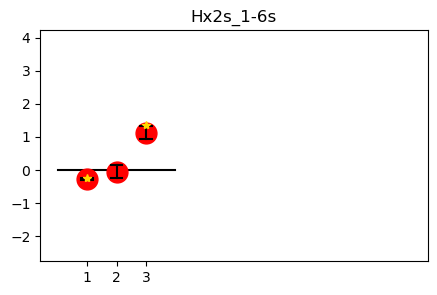

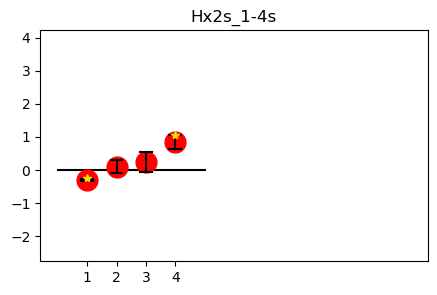

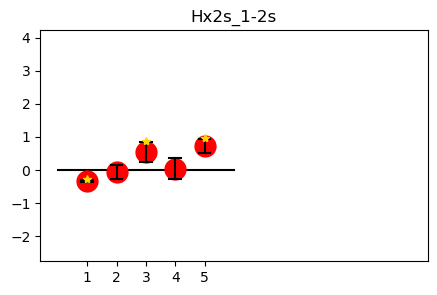

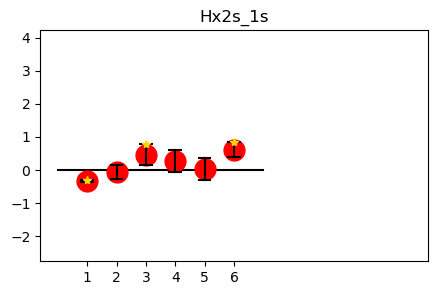

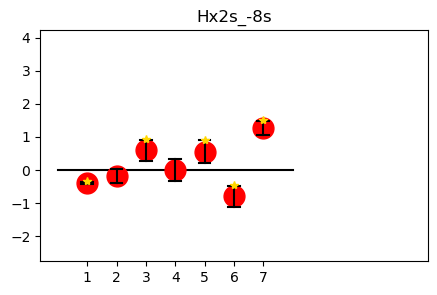

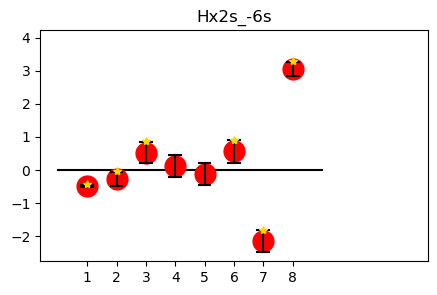

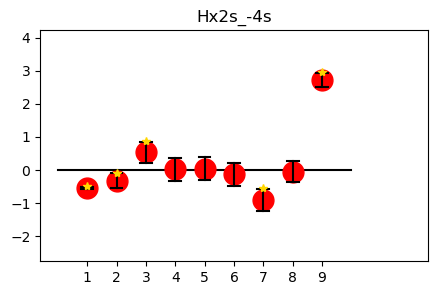

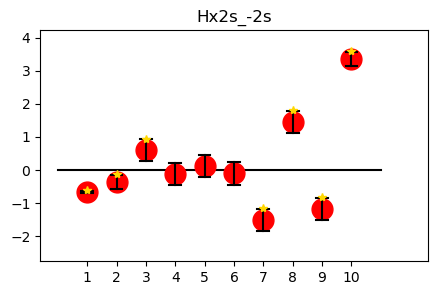

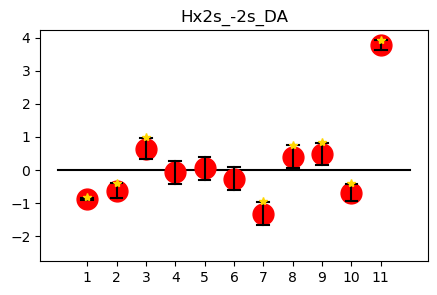

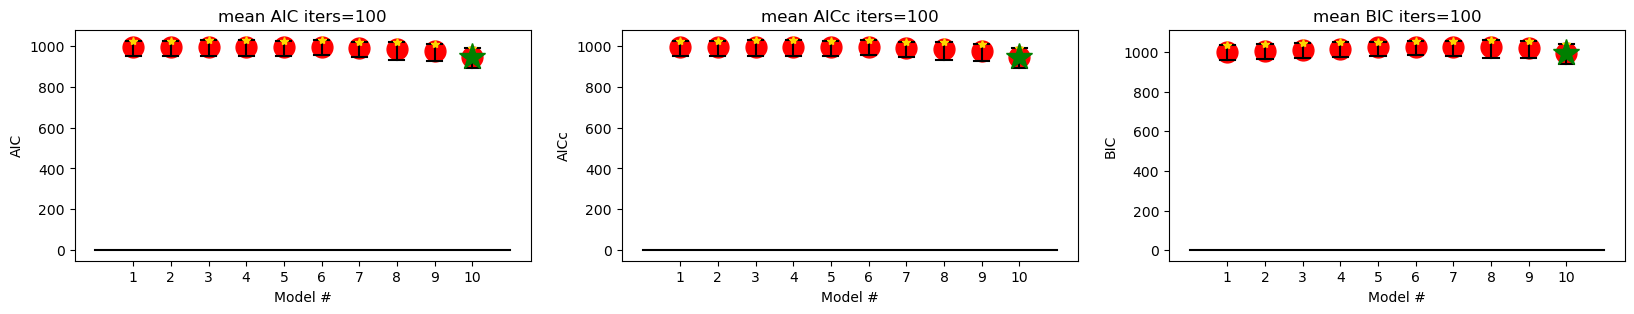

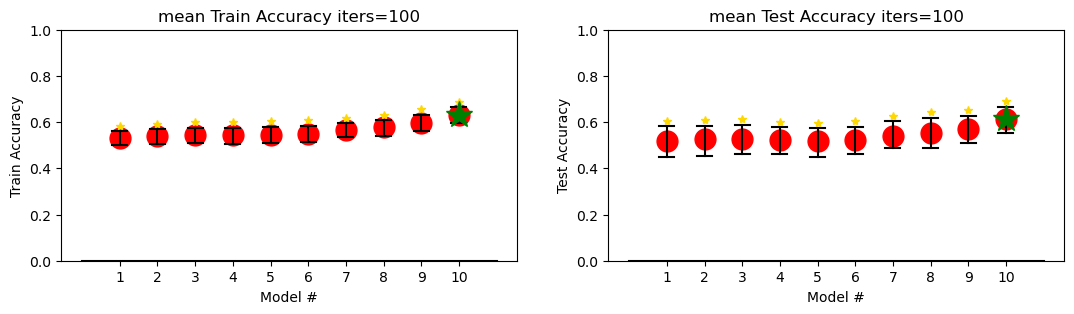

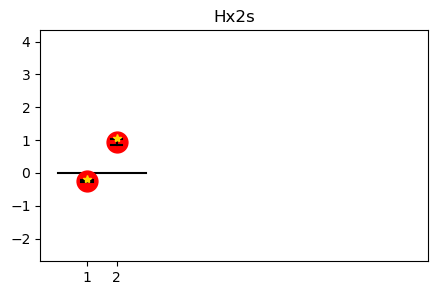

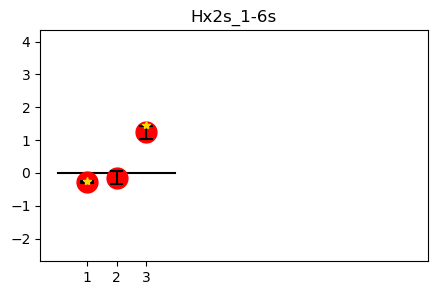

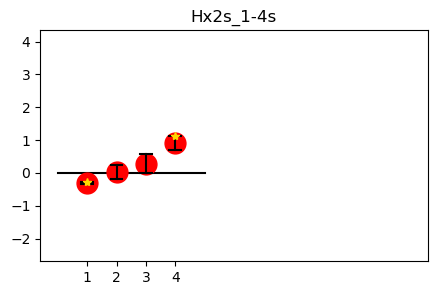

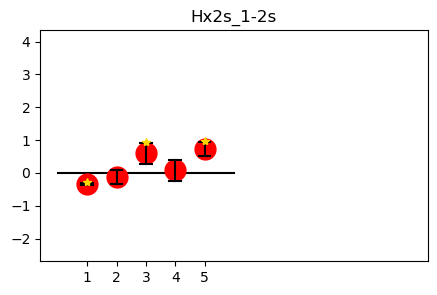

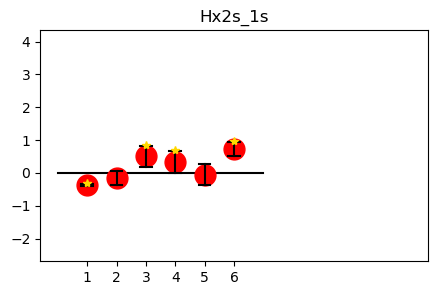

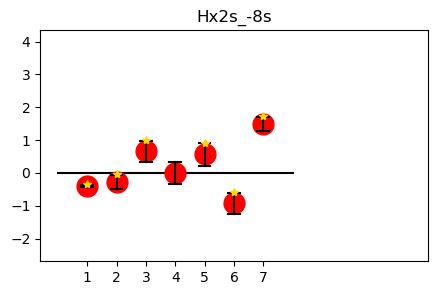

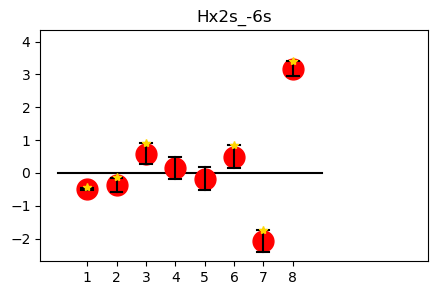

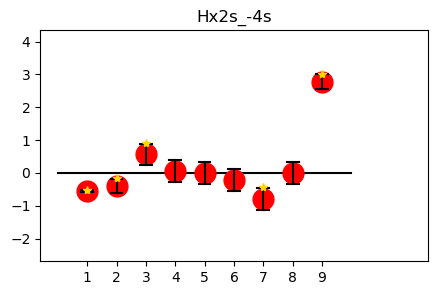

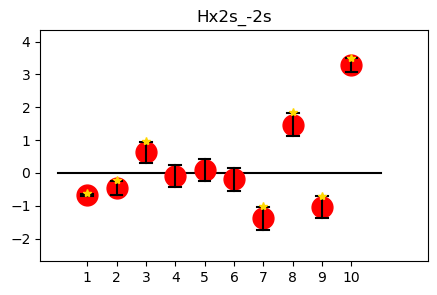

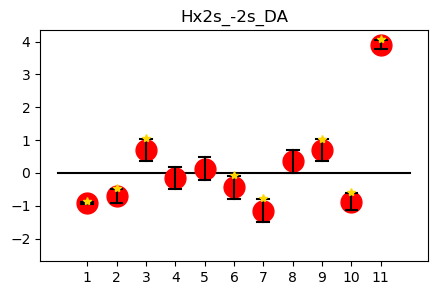

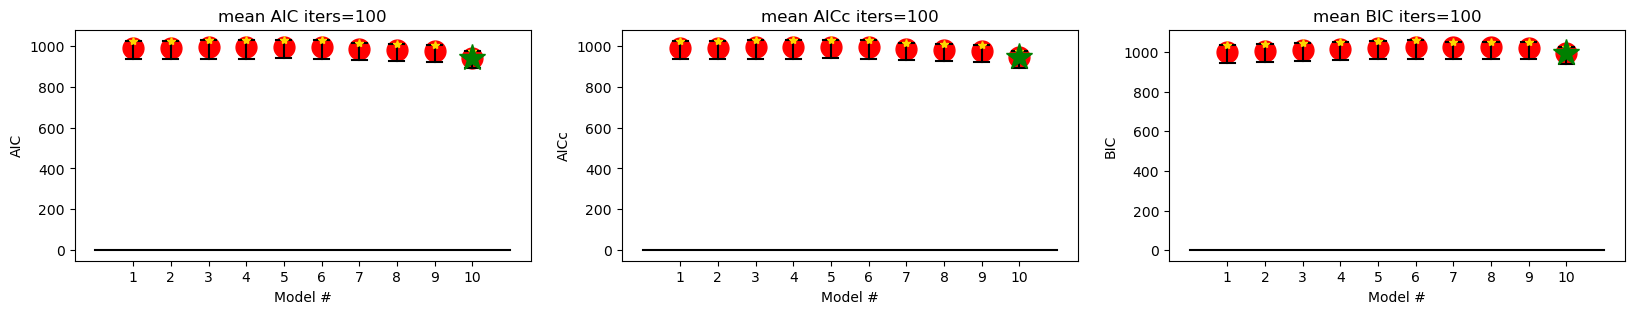

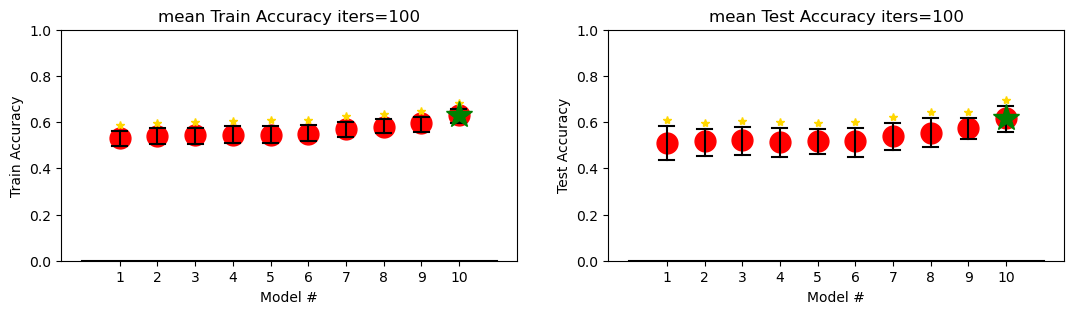

Post-modeling collation of results complete and variables saved to:
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Collated_results_nestlogit_200hxdst-150_B5TEST
	
-----------------------------------------------
	


In [3]:
runID = "dst-150_B5TEST"
collatedPath = "/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions"
modelpackagefunction = nestlogit_200hx_pkg#fullmodel_ocs_logit_200hx_pkg
postprocessingfunction = template_postprocessingfunction#bootlogit_timeslice_postprocessingfunction1

(fails, results,postprocessing) = run_collated_model(collatedPath, modelpackagefunction; 
    pathIDx = 1:2,runFails=false, failDirs=[], 
    postprocessingfunction=postprocessingfunction,
    compositesavepath="", runID=runID, suppressFigures=false); 

# Getting the explained deviance of the model rather than % correct

The logit model fitting function is `build_and_report_logit_model`, and it currently reports a percent correct.

However, explained deviance is more useful. (https://bookdown.org/egarpor/SSS2-UC3M/logreg-deviance.html)

the deviance is defined as the difference of likelihoods between the fitted model and the saturated model:

$$D=−2\log lik(\hat{β})+2\log lik(saturated model)$$

 
Since the likelihood of the saturated model is exactly one, then the deviance is simply another expression of the likelihood:

$$D=−2\log lik(\hat{β})$$
 
As a consequence, the deviance is always >= 0, being zero only if the fit is perfect.

A benchmark for evaluating the magnitude of the deviance is the null deviance,

$$D_0=−2\log lik(\hat{β_0})$$
 
which is the deviance of the worst model, the one fitted without any predictor, to the perfect model:

$$Y|(X1=x1,…,Xk=xk)∼Ber(logistic(β_0))$$
 
In this case, 

$$\hat{β_0}=logit(\frac{m}{n}) = \log \frac{ \frac{m}{n} }{1 − \frac{m}{n}} $$

where m is the number of 1’s in Y1,…,Yn.

    So, (1/2)/(1 - 1/2) = 1, log(1) = 0 for us for a perfect model.
    
    The deviance is then:
    
$$D_0 = −2\log lik(0)$$

The null deviance serves for comparing how much the model has improved by adding the predictors X1,…,Xk. This can be done by means of the $R^2$ statistic, which is a generalization of the determination coefficient in multiple linear regression:

$$R^2=1−\frac{D}{D_0}=1−\frac{\text{deviance(fitted logistic, saturated model)}}{\text{deviance(null model, saturated model)}}$$

This is convenient, because explained deviance of our perfectly balanced model is going to be the 1-deviance measure (since $D_0$ is 1)

This global measure of fit shares some important properties with the determination coefficient in linear regression:

1. It is a quantity between  0 and 1.
2. If the fit is perfect, then  $D=0$  and  $R^2=1$. 
3. If the predictors do not add anything to the regression, then  $D=D_0$  and  $R^2=0$.


In logistic regression, $R^2$  does not have the same interpretation as in linear regression:

1. Is not the percentage of variance explained by the logistic model, but rather a ratio indicating how close is the fit to being perfect or the worst.
2. It is not related to any correlation coefficient.

22


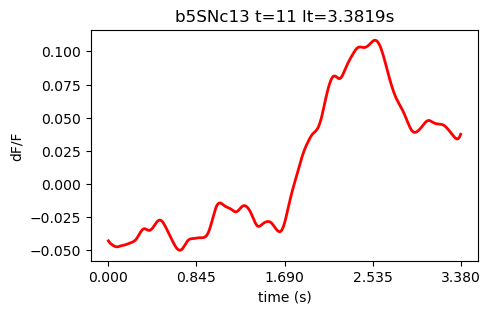

mean: 0.0121375603539823
median: -0.015091
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV


In [4]:
path ="/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/b5d13_CSV/b5d13_st17s_CSV";
data = extract_data(path);
truncated_data = truncate_at_cue_and_lickp250(data)
idx = check_imported_data(truncated_data, idx=11); #290 is good

In [9]:
truncated_data.xdata;

In [66]:
norm_df = makeSessionDataFrame(truncated_data; normalize=true, includeBL_LOI=false, baseline_data=truncated_data, LOI_data=truncated_data, include_history=false, history_spacing_s=0.25, n_hx_terms = 10, cut_out_cue=false)
df = updownsample(norm_df, norm_df[:LickState], 515, downOnly=true);
# X2, y2 =smote(norm_df[!,[:Y, :X]], norm_df.LickState, k = 5, pct_under = 150, pct_over = 200)
# df_balanced = X2
# df_balanced.LickState = y2;

# df = df_balanced;
describe(df)
train, test = TrainTestSplit(df,.75);
countmap(df.LickState)

Dict{Bool,Int64} with 2 entries:
  false => 515
  true  => 515

Accuracy of the training model is : 0.6443037974683544
ROCNums{Int64}
  p = 401
  n = 389
  tp = 248
  tn = 261
  fp = 128
  fn = 153

Accuracy of the test model is : 0.6583333333333333
deviance_explained of the train model is : 0.09459818581363533
deviance_explained of the test model is : 0.07815087803225917
ROCNums{Int64}
  p = 114
  n = 126
  tp = 73
  tn = 85
  fp = 41
  fn = 41



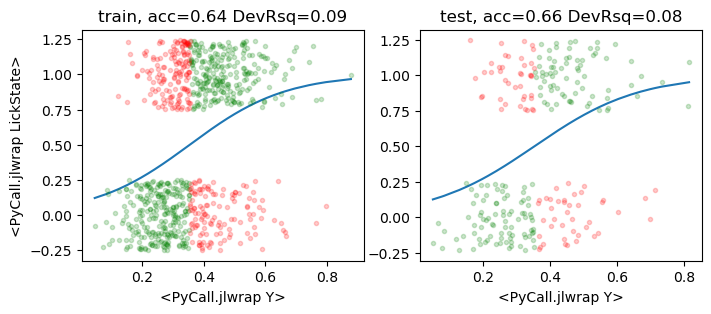

TRAINING
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────
TEST
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

(StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────, StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. E

In [101]:
Formula = @formula(LickState ~ Y) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="logit", verbose=true, figurePath=".")

In [100]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-02-24_2036) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl hazard_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

In [92]:
deviance_explained([1,1,0],[0.8,0.6,0.2])

(1.9142254527888203, 3.8190850097688767, -0.0, 0.49877380370104274)

Accuracy of the training model is : 0.6443037974683544
ROCNums{Int64}
  p = 401
  n = 389
  tp = 248
  tn = 261
  fp = 128
  fn = 153

Accuracy of the test model is : 0.6583333333333333
deviance_explained of the train model is : 0.09459818581363533
deviance_explained of the test model is : 0.07815087803225917
ROCNums{Int64}
  p = 114
  n = 126
  tp = 73
  tn = 85
  fp = 41
  fn = 41



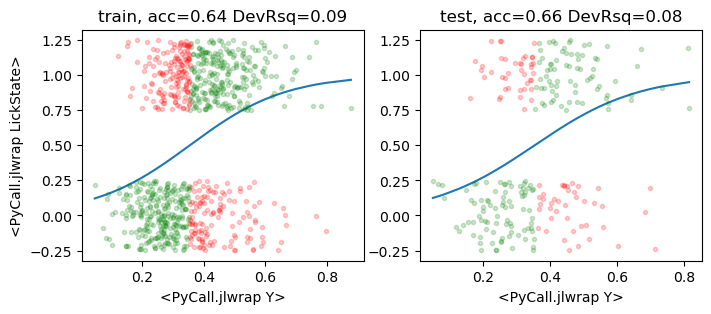

TRAINING
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────
TEST
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

(StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -2.27204    0.258465  -8.79    <1e-17   -2.77862   -1.76546
Y             6.41594    0.696504   9.21    <1e-19    5.05082    7.78106
────────────────────────────────────────────────────────────────────────, StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. E

In [102]:
Formula = @formula(LickState ~ Y) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="logit", verbose=true, figurePath=".")

Accuracy of the training model is : 0.6468354430379747
ROCNums{Int64}
  p = 401
  n = 389
  tp = 246
  tn = 265
  fp = 124
  fn = 155

Accuracy of the test model is : 0.6541666666666667
deviance_explained of the train model is : 0.09309753309831736
deviance_explained of the test model is : 0.07818104521565317
ROCNums{Int64}
  p = 114
  n = 126
  tp = 72
  tn = 85
  fp = 41
  fn = 42



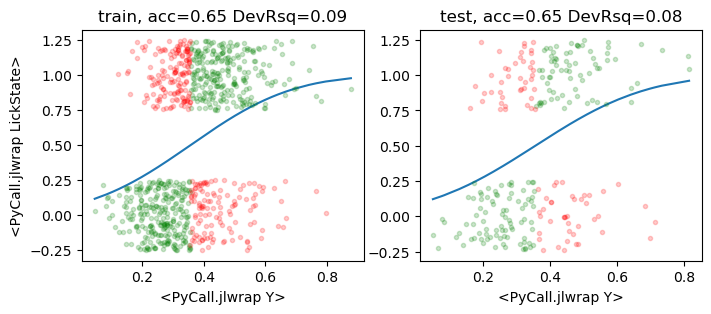

TRAINING
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -1.35915    0.151313  -8.98    <1e-18   -1.65572   -1.06259
Y             3.81289    0.403483   9.45    <1e-20    3.02208    4.60371
────────────────────────────────────────────────────────────────────────
TEST
StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
               

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

(StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  -1.35915    0.151313  -8.98    <1e-18   -1.65572   -1.06259
Y             3.81289    0.403483   9.45    <1e-20    3.02208    4.60371
────────────────────────────────────────────────────────────────────────, StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},ProbitLink},GLM.DensePredChol{Float64,Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

LickState ~ 1 + Y

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std.

In [103]:
Formula = @formula(LickState ~ Y) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="probit", verbose=true, figurePath=".")

In [68]:
Formula = @formula(LickState ~ 1) 
(logit_model, logit_model_test, accuracy_Sn, accuracy) = build_and_report_logit_model(Formula, train, test; modelName="model", modelClass="logit", verbose=true, figurePath=".")

LoadError: ArgumentError: collection must be non-empty

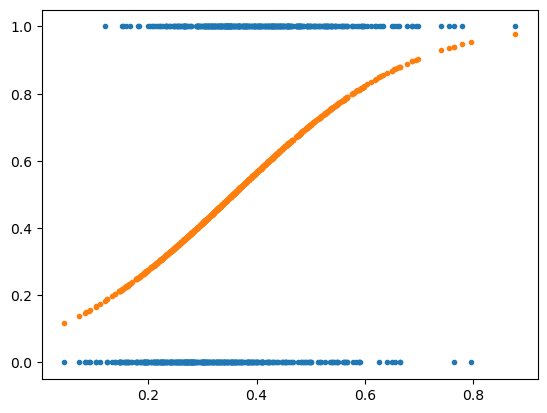

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x164033370>

In [69]:
yfit = StatsBase.predict(logit_model); #(logit_model.model)
y = train.LickState

ix = sortperm(train.Y)
figure
plot(train.Y[ix], y[ix], ".")
plot(train.Y[ix], yfit[ix], ".")

Unbelievably, Julia gives you the deviance but not the null deviance. So we have to figure this out ourselves

In [70]:
deviance(logit_model.model)

993.0493678400087

In [72]:
function explainedDeviance(y, yfit)
    TSS = nansum((y .- nanmean(y)).^2);
    ESS = nansum((yfit .- nanmean(y)).^2);
    RSS = nansum((yfit .- y).^2);
    println("TSS =", TSS)
    println("ESS =", ESS)
    println("RSS =", RSS)
    Rsq = ESS/(RSS+ESS)
    println("Rsq = ESS/(TSS) = ", Rsq)
    return Rsq
end

explainedDeviance (generic function with 1 method)

In [81]:
explainedDeviance(y*1.0, yfit)

TSS =197.45443037974673
ESS =23.31207127851319
RSS =172.08571868223137
Rsq = ESS/(TSS) = 0.11930570598161108


0.11930570598161108

In [219]:
CSV.write("/Users/lilis/Desktop/y.csv",DataFrame(y=y))
CSV.write("/Users/lilis/Desktop/yfit.csv",DataFrame(yfit=yfit))
CSV.write("/Users/lilis/Desktop/X.csv",DataFrame(X=train.Y))

LoadError: UndefVarError: y not defined

# Fixing error propagation

Our bootstrapped model fitting function is `modelSelectionByAICBICxval` -- Yes, the name no longer makes sense, this is not an xval.

Nevertheless, we can use this fxn to bootstrap models to get a better estimate of our downsampled model fit, where we are downsampling the no-lick state.



In [235]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-03-02_2247) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl hazard_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

-----------------------------------------------
	
Initializing run_collated_model for nestlogit_200hxdst-150_B5fixTEST
	
Found 2 sessions in /Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions:
1. b5_SNc_13
2. b5_SNc_13_2
	Using only a subset of these sessions:
b5_SNc_13
b5_SNc_13_2
	
-----------------------------------------------
Processing b5_SNc_13...(2021-03-02_2247)
      *---------- (1/2) 03/02/21 22:47:19
	
truncating data back: -0.15s
"     WARNING: NB that we are normalizing history separate from in-trial dopamine..."
Downsampling the no-lick state => using 477=n, the number of first-licks
   *---------- (1/100) 03/02/21 22:47:032
   *=--------- (10/100) 03/02/21 22:47:777
   *==-------- (20/100) 03/02/21 22:47:056
   *===------- (30/100) 03/02/21 22:47:508
   *====------ (40/100) 03/02/21 22:47:72
   *=====----- (50/100) 03/02/21 22:47:136
   *======---- (60/100) 03/02/21 22:47:364
   *=======--- (70/100) 03/02/21

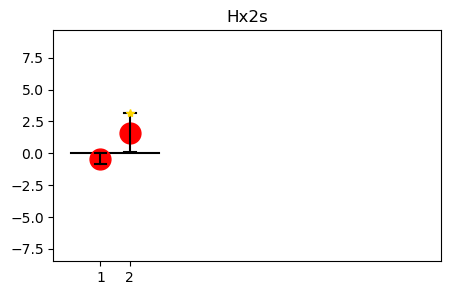

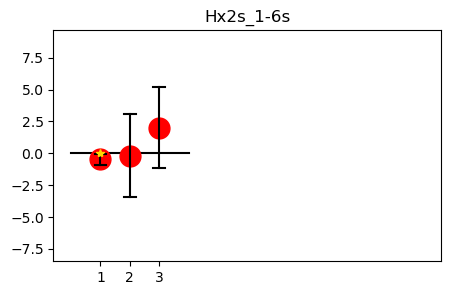

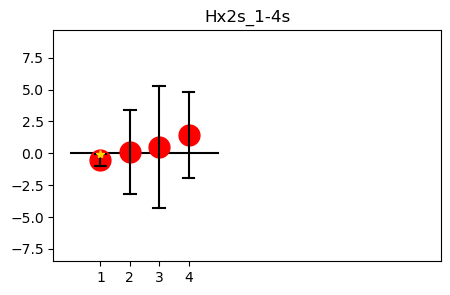

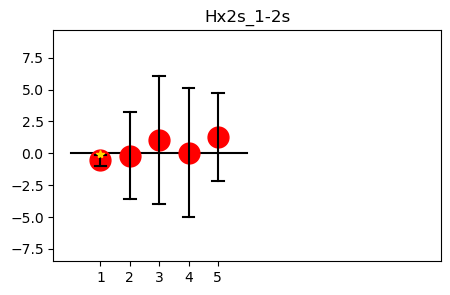

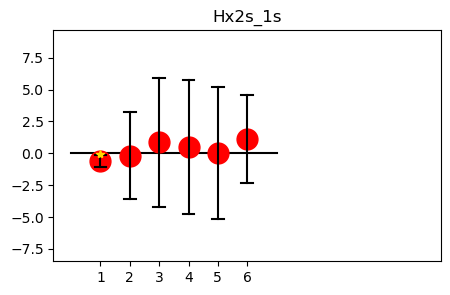

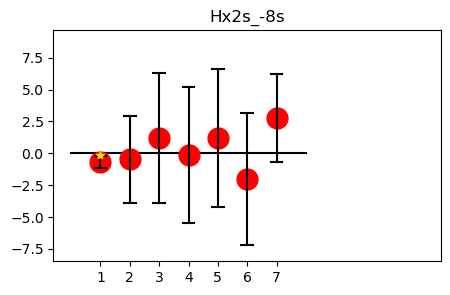

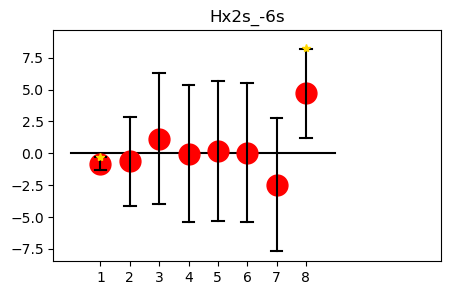

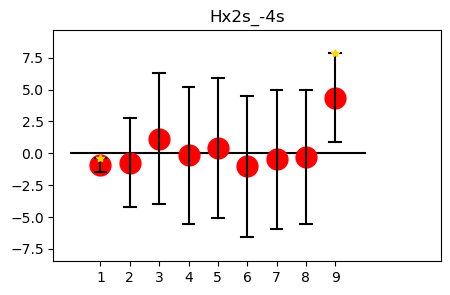

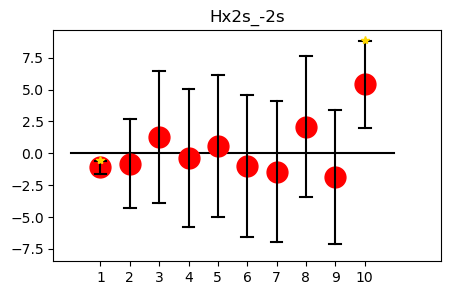

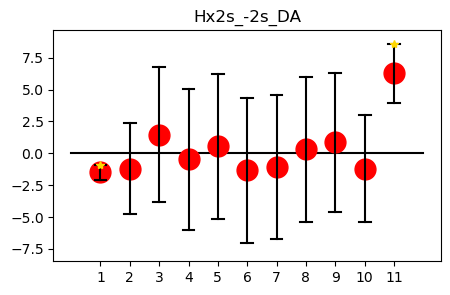

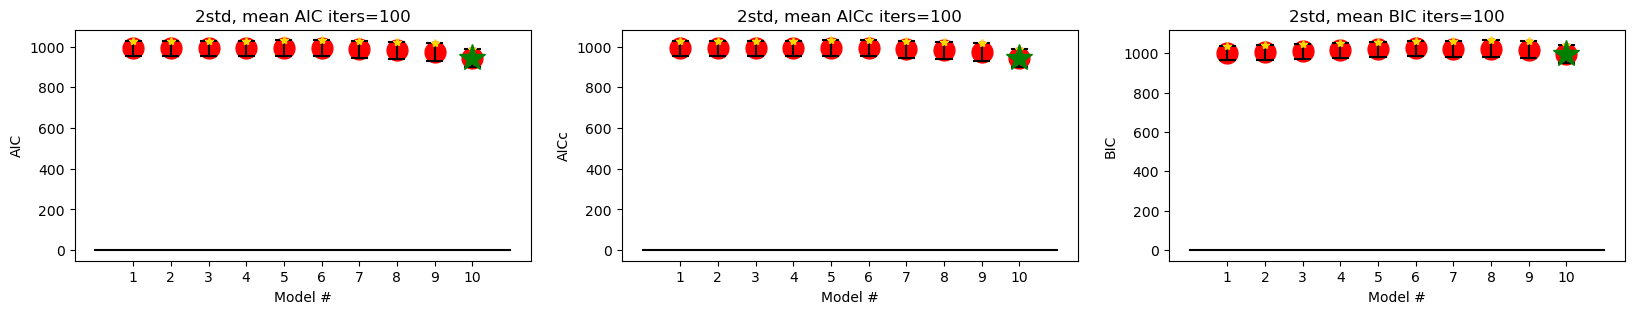

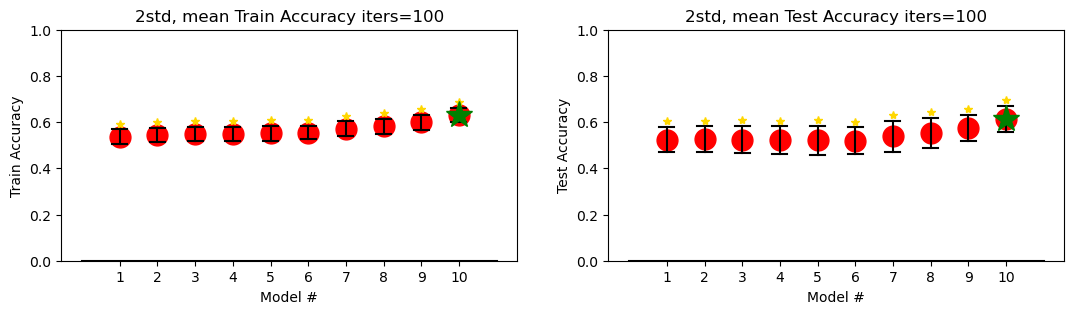

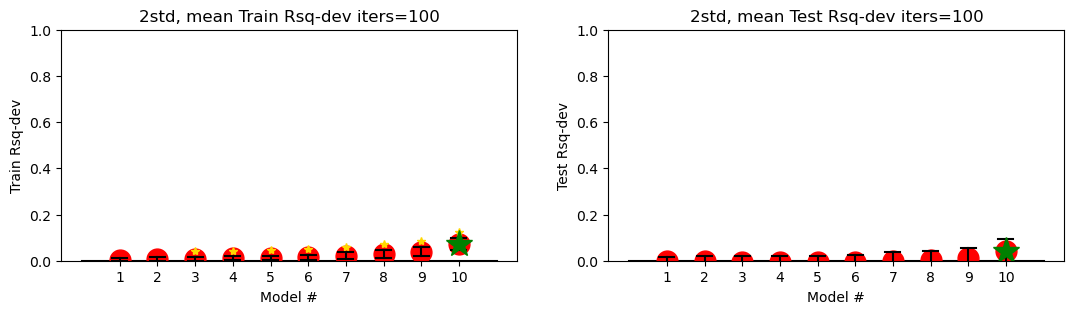

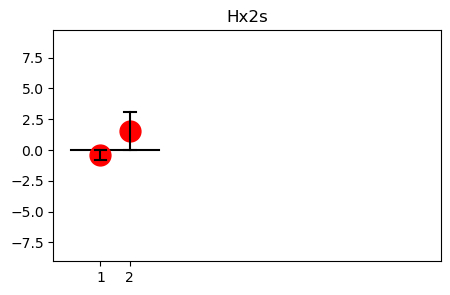

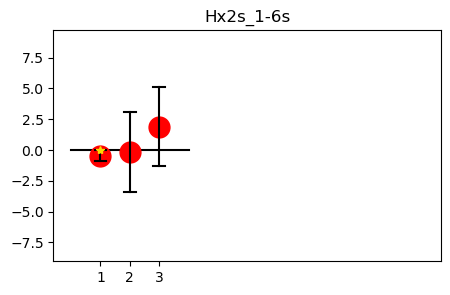

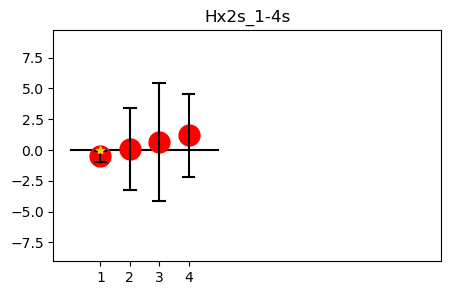

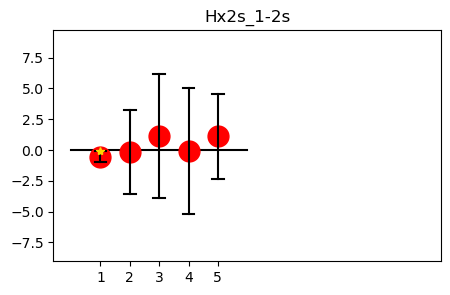

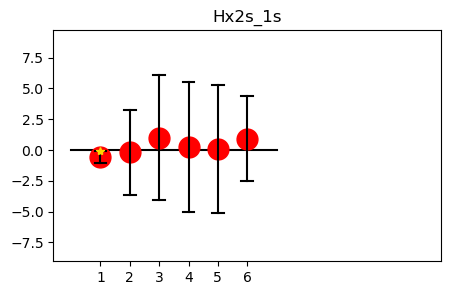

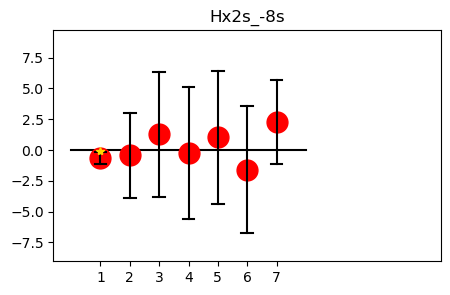

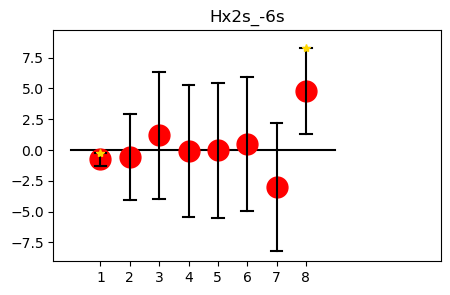

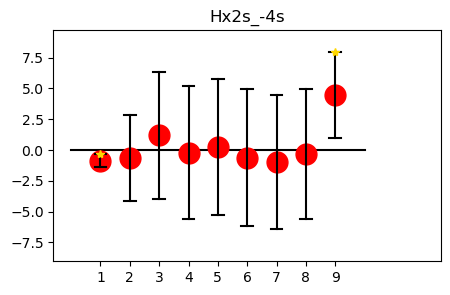

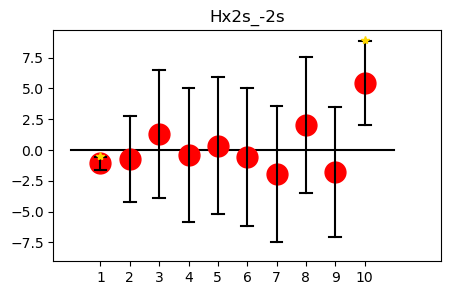

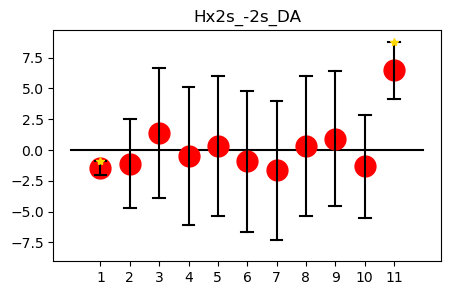

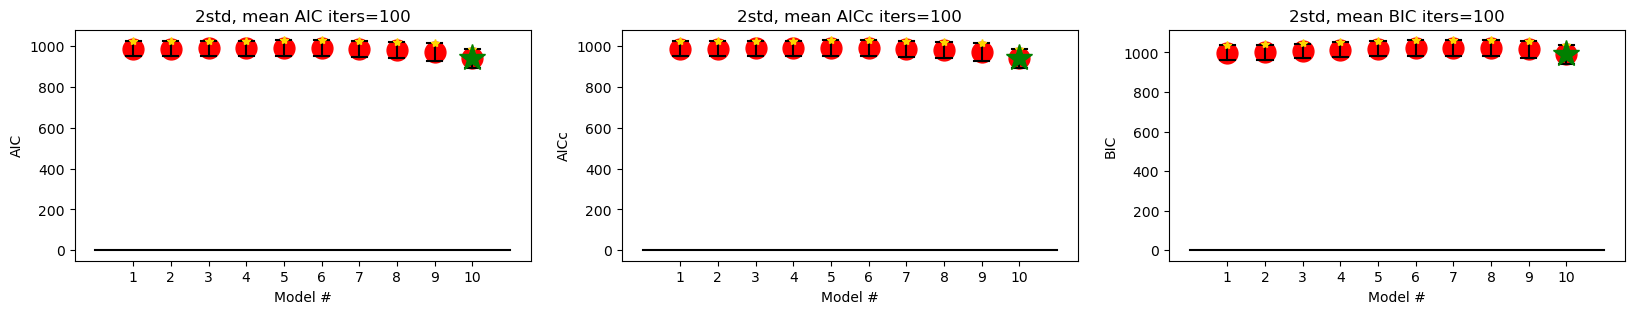

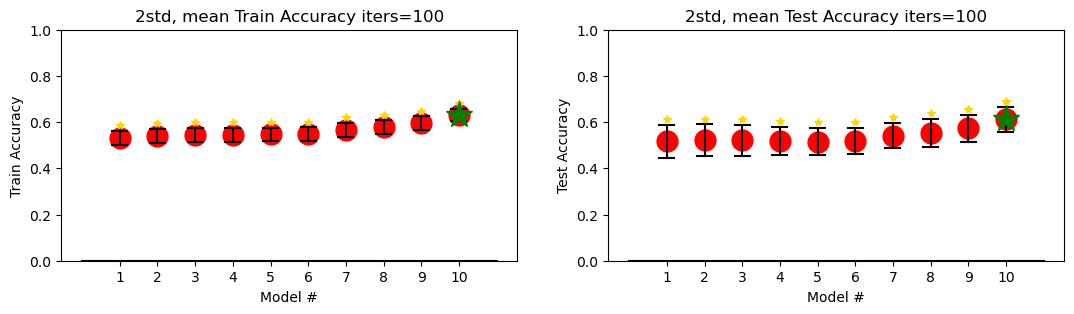

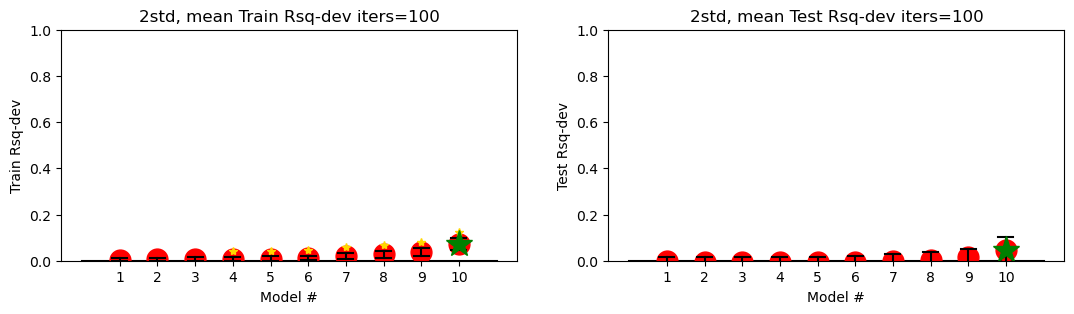

/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13_2/results_nestlogit_200hxdst-150_B5fixTEST/th_summary_2021-03-02_2247.csv
saving... 
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions/b5_SNc_13_2/results_nestlogit_200hxdst-150_B5fixTEST/results_df_2021-03-02_2247.csv
-----------------------------------------------
	
Completed procesing of 2 sessions. (2021-03-02_2247) ~
	
	Find results in each sessions' folder in: nestlogit_200hxdst-150_B5fixTEST
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions
	
Initiating post-modeling collation of results...
	This is a template postprocessingfunction. To do work, you need to 
		implement what you want to collate from the results here!
Post-modeling collation of results complete and variables saved to:
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles

In [236]:
runID = "dst-150_B5fixTEST"
collatedPath = "/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions"
compositeSavePath = "/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Composite_B5fixTEST"
modelpackagefunction = nestlogit_200hx_pkg#fullmodel_ocs_logit_200hx_pkg
postprocessingfunction = template_postprocessingfunction#bootlogit_timeslice_postprocessingfunction1

(fails, results,postprocessing) = run_collated_model(collatedPath, modelpackagefunction; 
    pathIDx = 1:2,runFails=false, failDirs=[], 
    postprocessingfunction=postprocessingfunction,
    compositesavepath=compositeSavePath, runID=runID, suppressFigures=false); 

In [100]:
names(results.results[1].th_summary[1])

6-element Array{Symbol,1}:
 :modelName
 :composite_th
 :composite_se
 :composite_CImin
 :composite_CImax
 :composite_mdof

In [103]:
results.results[1].th_summary[1]

,modelName,composite_th,composite_se,composite_CImin,composite_CImax,composite_mdof
,Any,Any,Any,Any,Any,Any
1,Hx2s,-0.418883,0.217541,-0.845262,0.0074954,714.0
2,Hx2s,1.62002,0.7915,0.0686844,3.17136,714.0
3,Hx2s_1-6s,-0.474665,0.223713,-0.913142,-0.0361883,713.0
4,Hx2s_1-6s,0.0705944,1.65998,-3.18296,3.32415,713.0
5,Hx2s_1-6s,1.75067,1.63817,-1.46014,4.96147,713.0
6,Hx2s_1-4s,-0.520274,0.23206,-0.975111,-0.0654365,712.0
7,Hx2s_1-4s,0.31732,1.69675,-3.00831,3.64295,712.0
8,Hx2s_1-4s,0.385575,2.4591,-4.43426,5.20541,712.0
9,Hx2s_1-4s,1.2892,1.71258,-2.06746,4.64585,712.0


In [120]:
results.results[2].th_summary[3]

,modelName,composite_th,composite_se,composite_CImin,composite_CImax,composite_mdof
,Any,Any,Any,Any,Any,Any
1,Hx2s,-0.419319,0.216777,-0.844202,0.0055638,713.0
2,Hx2s,1.61368,0.788347,0.0685208,3.15884,713.0
3,Hx2s_1-6s,-0.477686,0.223405,-0.915558,-0.0398133,712.0
4,Hx2s_1-6s,0.0490286,1.65767,-3.2,3.29806,712.0
5,Hx2s_1-6s,1.77636,1.64438,-1.44662,4.99934,712.0
6,Hx2s_1-4s,-0.524149,0.231754,-0.978387,-0.0699111,711.0
7,Hx2s_1-4s,0.294756,1.6924,-3.02234,3.61185,711.0
8,Hx2s_1-4s,0.401925,2.46403,-4.42756,5.23141,711.0
9,Hx2s_1-4s,1.3018,1.7228,-2.07489,4.67848,711.0


In [104]:
modelNames = unique(results.results[1].th_summary[1].modelName)

10-element Array{Any,1}:
 "Hx2s"
 "Hx2s_1-6s"
 "Hx2s_1-4s"
 "Hx2s_1-2s"
 "Hx2s_1s"
 "Hx2s_-8s"
 "Hx2s_-6s"
 "Hx2s_-4s"
 "Hx2s_-2s"
 "Hx2s_-2s_DA"

In [121]:
# ********WHY IS THIS 3x1 ARRAY??????????????
th_summary_this_sesh = results.results[1].th_summary[1][model_indicies, :]



,modelName,composite_th,composite_se,composite_CImin,composite_CImax,composite_mdof
,Any,Any,Any,Any,Any,Any
1,Hx2s_1-6s,-0.474665,0.223713,-0.913142,-0.0361883,713.0
2,Hx2s_1-6s,0.0705944,1.65998,-3.18296,3.32415,713.0
3,Hx2s_1-6s,1.75067,1.63817,-1.46014,4.96147,713.0


In [107]:
model_indicies = findall(x->x==modelNames[2], results.results[1].th_summary[1].modelName)

3-element Array{Int64,1}:
 3
 4
 5

In [47]:
bootlogit_postprocessingfunction1(results, compositeSavePath, modelpackagefunction; runID=0)

In [169]:
function combine_th_across_sessions2(results, compositesavepath, runID,packagename)
# 	pwd()
    ret_dir = pwd()
    cd(compositesavepath)
    modelNames = unique(results.results[1].th_summary[1].modelName)
    n_sesh = length(results.results)
    i_sesh=1
    i_model=1
    i_iter=1
    n_models = length(results.results[i_sesh].AICs)
    n_iters = length(results.results[i_sesh].AICs[i_model])
    
    axs = []
    fs = []
    th_summary = DataFrame(modelName=[], composite_th=[], composite_se=[], composite_CImin=[], composite_CImax=[], composite_mdof = [])
    for model = 1:n_models
        model_indicies = findall(x->x==modelNames[model], results.results[1].th_summary[1].modelName)
        d = length(model_indicies)
        ths_this_model = [Vector{Float64}(undef, 0) for i=1:length(model_indicies)]
        se_ths_this_model = [Vector{Float64}(undef, 0) for i=1:length(model_indicies)]
        mdofs_this_model = [Vector{Float64}(undef, 0) for i=1:length(model_indicies)]
        

        # only propagate error ACROSS sessions, not within a session... 3/2/2021
        # start by pulling out the composite ths for the model for sesh 1
        for i_sesh = 1:n_sesh
            th_summary_this_sesh = results.results[i_sesh].th_summary[1][model_indicies, :]
            for i_th = 1:d
                push!(ths_this_model[i_th], th_summary_this_sesh.composite_th[i_th])
                push!(se_ths_this_model[i_th], th_summary_this_sesh.composite_se[i_th])
                push!(mdofs_this_model[i_th], th_summary_this_sesh.composite_mdof[i_th])
            end
        end
        # now, get the composite ths for each theta
        composite_th = Vector{Float64}(undef, 0)
        composite_se = Vector{Float64}(undef, 0)
        composite_CImin = Vector{Float64}(undef, 0)
        composite_CImax = Vector{Float64}(undef, 0)
        composite_mdof = Vector{Float64}(undef, 0)
        for i_th = 1:length(model_indicies)
            result_df_this_theta = DataFrame(train_dof = [mdofs_this_model[i_th]], 
                        train_ths = [[ths_this_model[i_th]]], 
                        train_se_ths = [[se_ths_this_model[i_th]]])
            
            
            (meanTh, propagated_se_th, CImin, CImax,mdf) = getCompositeTheta(ths_this_model[i_th], se_ths_this_model[i_th], mdofs_this_model[i_th], propagate=true)
        
            push!(composite_th, meanTh)
            push!(composite_se, propagated_se_th)
            push!(composite_CImin, CImin)
            push!(composite_CImax, CImax)
            push!(composite_mdof, mdf)
        end
        
        f = figure(figsize=(5,3))
	    ax = subplot(1,1,1)
	    plot_with_CI(composite_th, composite_CImin, composite_CImax, ax=ax)
	    ax.set_title(modelNames[model])
	    ax.set_xticks(collect(1:d))
        
        push!(axs, ax)
        push!(fs, f)

        append!(th_summary, 
            DataFrame(
                modelName = modelNames[model],
                composite_th=composite_th, 
                composite_se=composite_se, 
                composite_CImin=composite_CImin, 
                composite_CImax=composite_CImax,
                composite_mdof = composite_mdof,
                ))
        
        CSV.write(join([modelNames[model], "_composite_ths_nboot", n_iters, "_nsesh", n_sesh, 
                    ".csv"]),DataFrame(composite_th = composite_th))
        CSV.write(join([modelNames[model], "_composite_se_ths_nboot", n_iters, "_nsesh", n_sesh, 
                    ".csv"]),DataFrame(composite_se = composite_se))
        CSV.write(join([modelNames[model], "_composite_dofs_nboot", n_iters, "_nsesh", n_sesh, 
                    ".csv"]),DataFrame(composite_mdof = composite_mdof))
        CSV.write(join([modelNames[model], "_composite_th_summary_nboot", n_iters, "_nsesh", n_sesh, 
                    ".csv"]),DataFrame(th_summary = th_summary))
    end
    set_xaxes_same_scale(axs)
    set_yaxes_same_scale(axs)

    cd(compositesavepath)
    for i=1:length(fs)
        println(modelNames[i])
        printFigure(join(["composite_", modelNames[i], "_theta_summary_nboot", n_iters, "_nsesh", n_sesh]); fig=fs[i],figurePath=compositesavepath)
    end
    println("Figs saved to:", compositesavepath)
    cd(ret_dir)  
    return Nothing
end;


Hx2s
Hx2s_1-6s
Hx2s_1-4s
Hx2s_1-2s
Hx2s_1s
Hx2s_-8s
Hx2s_-6s
Hx2s_-4s
Hx2s_-2s


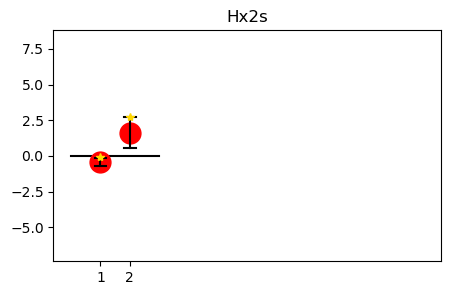

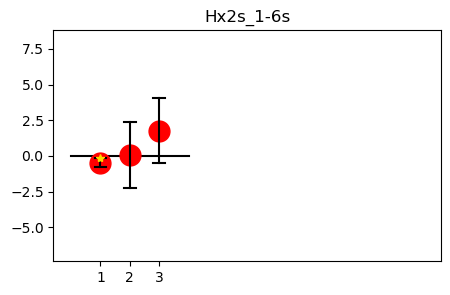

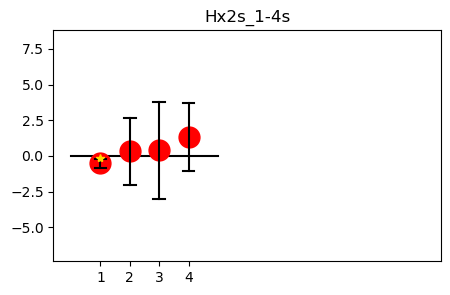

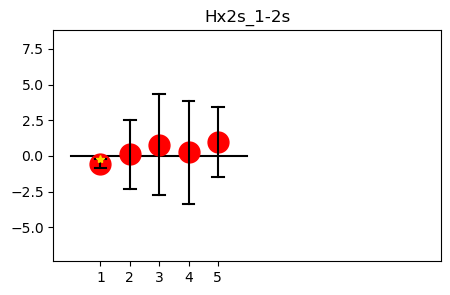

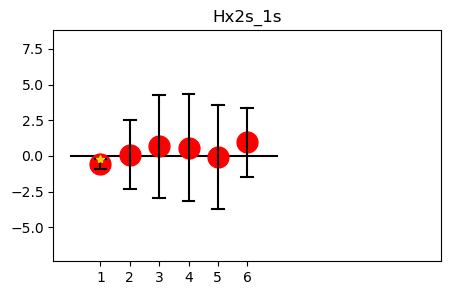

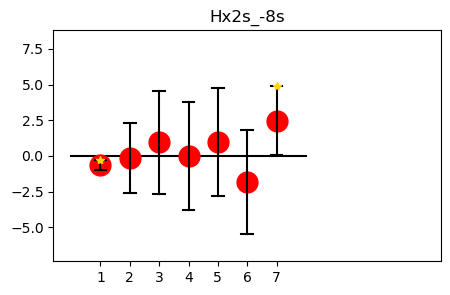

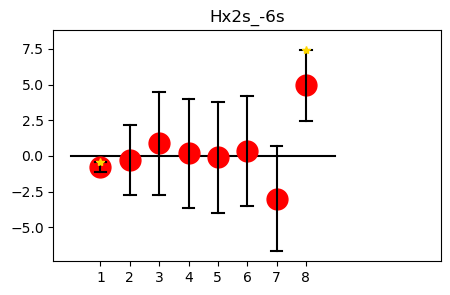

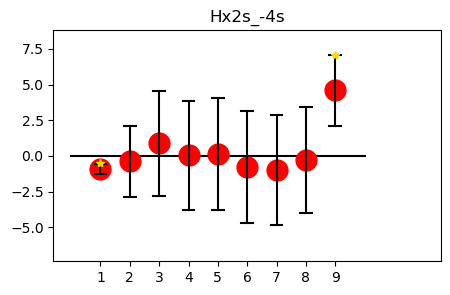

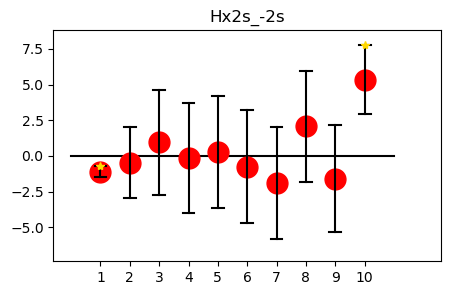

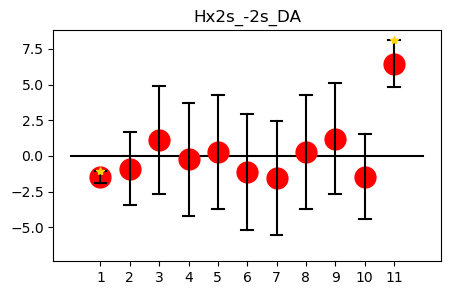

Hx2s_-2s_DA
Figs saved to:/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Composite_B5fixTEST


In [170]:
(th_summaryyy) = combine_th_across_sessions2(results, compositeSavePath, runID,"test");

In [140]:
result_dfff[:,1:3]

LoadError: BoundsError: attempt to access 0-element Array{AbstractArray{T,1} where T,1} at index [1:3]

In [93]:
result_df2[:,:]

,train_dof,train_ths,train_se_ths
,Array…,Array…,Array…
1,[706.0],[[-1.42332]],[[0.285721]]


In [37]:
ENV["COLUMNS"]=1000

1000

"     WARNING: Using new combine_th_across_sessions 3/2/2021"
Hx2s
Hx2s_1-6s
Hx2s_1-4s
Hx2s_1-2s
Hx2s_1s
Hx2s_-8s
Hx2s_-6s
Hx2s_-4s
Hx2s_-2s
Hx2s_-2s_DA


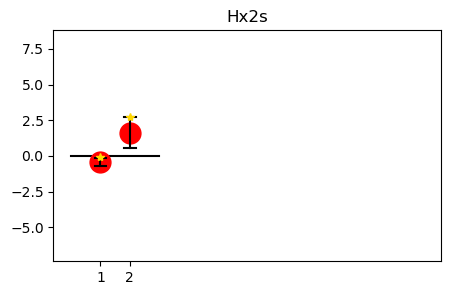

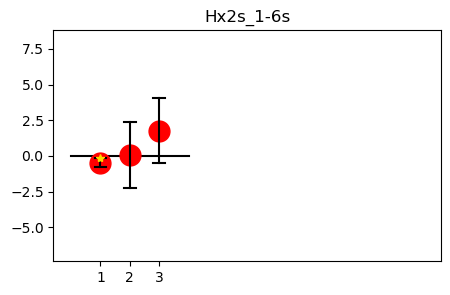

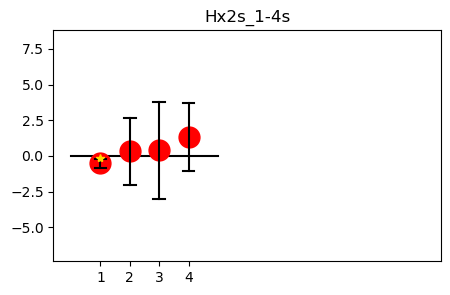

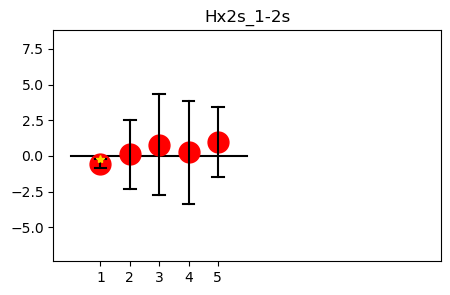

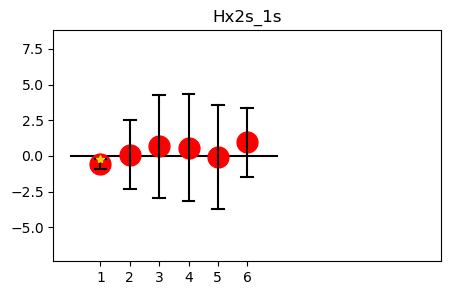

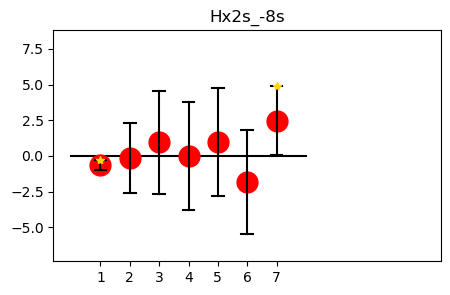

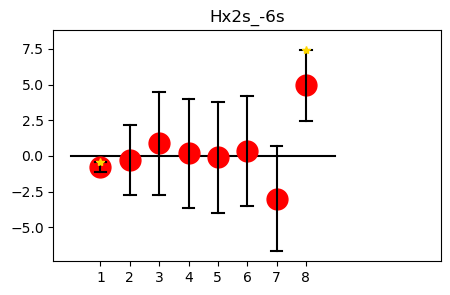

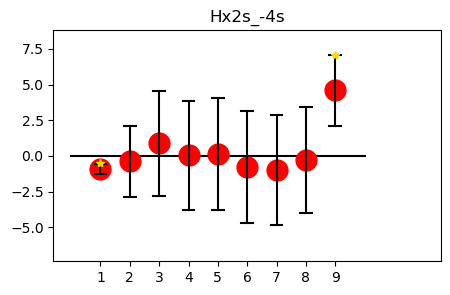

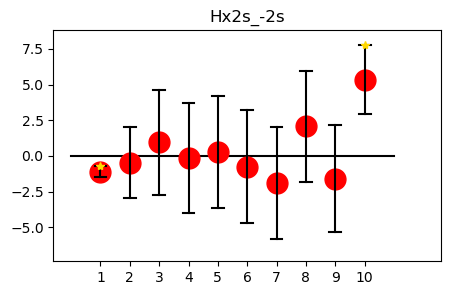

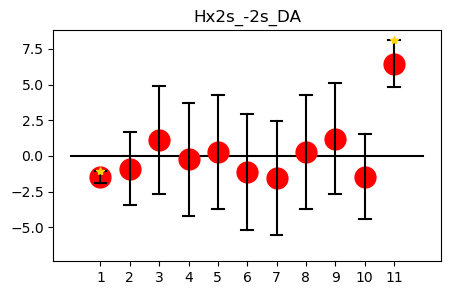

Figs saved to:/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Composite_B5fixTEST


Nothing

In [172]:
combine_th_across_sessions(results, compositeSavePath, runID,"test")

# To make propagatable errors in AIC/BIC and other stuff, we will use 2std for our CI, which is approx 95% CI in bootstrap. 
There's small discrepancy, but doesn't seem to change the answer

In [245]:
function combine_AICBIC_across_sessions2(results, compositesavepath, runID, packagename)
    # this new version will propagate error across sessions rather than using the range on all sesh...
    warning("using new combine_AICBIC_across_sessions2 that propagates error across sessions")
    n_sesh = length(results.results)
    i_sesh=1
    i_model=1
    i_iter=1
    n_models = length(results.results[i_sesh].AICs)
    n_iters = length(results.results[i_sesh].AICs[i_model])
    
    compositeAICs = nanmat(n_models, 1)
    composite_stdAICs = nanmat(n_models, 1)
    compositeAICcs = nanmat(n_models, 1)
    composite_stdAICcs = nanmat(n_models, 1)
    compositeBICs = nanmat(n_models, 1)
    composite_stdBICs = nanmat(n_models, 1)
    composite_Sn_accuracys = nanmat(n_models, 1)
    composite_std_Sn_accuracys = nanmat(n_models, 1)
    composite_accuracys_test = nanmat(n_models, 1)
    composite_std_accuracys_test = nanmat(n_models, 1)
    composite_Sn_dev_explained = nanmat(n_models, 1)
    composite_std_Sn_dev_explained = nanmat(n_models, 1)
    composite_dev_explained = nanmat(n_models, 1)
    composite_std_dev_explained = nanmat(n_models, 1)
    
    CImin_stdAICs = nanmat(n_models, 1)
    CImin_stdAICcs = nanmat(n_models, 1)
    CImin_stdBICs = nanmat(n_models, 1)
    CImin_std_Sn_accuracys = nanmat(n_models, 1)
    CImin_std_accuracys_test = nanmat(n_models, 1)
    CImin_std_Sn_dev_explained = nanmat(n_models, 1)
    CImin_std_dev_explained = nanmat(n_models, 1)
    
    CImax_stdAICs = nanmat(n_models, 1)
    CImax_stdAICcs = nanmat(n_models, 1)
    CImax_stdBICs = nanmat(n_models, 1)
    CImax_std_Sn_accuracys = nanmat(n_models, 1)
    CImax_std_accuracys_test = nanmat(n_models, 1)
    CImax_std_Sn_dev_explained = nanmat(n_models, 1)
    CImax_std_dev_explained = nanmat(n_models, 1)

    
    for i_model = 1:n_models
        model_indicies = findall(x->x==modelNames[i_model], results.results[1].th_summary[1].modelName)
        meanAICs = Vector{Float64}(undef, 0)
        stdAICs = Vector{Float64}(undef, 0)
        meanAICcs = Vector{Float64}(undef, 0)
        stdAICcs = Vector{Float64}(undef, 0)
        meanBICs = Vector{Float64}(undef, 0)
        stdBICs = Vector{Float64}(undef, 0)
        mean_Sn_accuracys = Vector{Float64}(undef, 0)
        std_Sn_accuracys = Vector{Float64}(undef, 0)
        mean_accuracys_test = Vector{Float64}(undef, 0)
        std_accuracys_test = Vector{Float64}(undef, 0)
        mean_Sn_dev_explained = Vector{Float64}(undef, 0)
        std_Sn_dev_explained = Vector{Float64}(undef, 0)
        mean_dev_explained = Vector{Float64}(undef, 0)
        std_dev_explained = Vector{Float64}(undef, 0)

        dof = []
        for i_sesh = 1:n_sesh
            th_summary_this_sesh = results.results[i_sesh].th_summary[1][model_indicies, :]
            push!(dof, th_summary_this_sesh.composite_mdof[1])
            mdofs_this_model = [Vector{Float64}(undef, 0) for i=1:length(model_indicies)]
            
            push!(meanAICs, results.results[i_sesh].meanAIC[i_model])
            push!(meanAICcs, results.results[i_sesh].meanAICc[i_model])
            push!(meanBICs, results.results[i_sesh].meanBIC[i_model])
            push!(mean_Sn_accuracys, results.results[i_sesh].meanAccuracy_Sn[i_model])
            push!(mean_accuracys_test, results.results[i_sesh].meanAccuracy_test[i_model])
            push!(mean_Sn_dev_explained, results.results[i_sesh].mean_deviance_explained_Sn[i_model])
            push!(mean_dev_explained, results.results[i_sesh].mean_deviance_explained[i_model])
            
            push!(stdAICs, results.results[i_sesh].stdAIC[i_model])
            push!(stdAICcs, results.results[i_sesh].stdAICc[i_model])
            push!(stdBICs, results.results[i_sesh].stdBIC[i_model])
            push!(std_Sn_accuracys, results.results[i_sesh].std_Sn_accuracy[i_model])
            push!(std_accuracys_test, results.results[i_sesh].std_accuracy_test[i_model])
            push!(std_Sn_dev_explained, results.results[i_sesh].std_Sn_dev_explained[i_model])
            push!(std_dev_explained, results.results[i_sesh].std_dev_explained[i_model])            

        end
        # We can now propagate the std across sessions using the error propagation method, same as th...
        (compositeAICs[i_model], composite_stdAICs[i_model], CImin_stdAICs[i_model], CImax_stdAICs[i_model],mdf) = getCompositeTheta(meanAICs, stdAICs, dof, propagate=true)
        (compositeAICcs[i_model], composite_stdAICcs[i_model], CImin_stdAICcs[i_model], CImax_stdAICcs[i_model],mdf) = getCompositeTheta(meanAICcs, stdAICcs, dof, propagate=true)
        (compositeBICs[i_model], composite_stdBICs[i_model], CImin_stdBICs[i_model], CImax_stdBICs[i_model],mdf) = getCompositeTheta(meanBICs, stdBICs, dof, propagate=true)
        (composite_Sn_accuracys[i_model], composite_std_Sn_accuracys[i_model], CImin_std_Sn_accuracys[i_model], CImax_std_Sn_accuracys[i_model],mdf) = getCompositeTheta(mean_Sn_accuracys, std_Sn_accuracys, dof, propagate=true)
        (composite_accuracys_test[i_model], composite_std_accuracys_test[i_model], CImin_std_accuracys_test[i_model], CImax_std_accuracys_test[i_model],mdf) = getCompositeTheta(mean_accuracys_test, std_accuracys_test, dof, propagate=true)
        (composite_Sn_dev_explained[i_model], composite_std_Sn_dev_explained[i_model], CImin_std_Sn_dev_explained[i_model], CImax_std_Sn_dev_explained[i_model],mdf) = getCompositeTheta(mean_Sn_dev_explained, std_Sn_dev_explained, dof, propagate=true)
        (composite_dev_explained[i_model], composite_std_dev_explained[i_model], CImin_std_dev_explained[i_model], CImax_std_dev_explained[i_model],mdf) = getCompositeTheta(mean_dev_explained, std_dev_explained, dof, propagate=true)
        
    end
    
    
    compositeAICs = vec(compositeAICs)
    compositeAICcs = vec(compositeAICcs)
    compositeBICs = vec(compositeBICs)
    composite_Sn_accuracys = vec(composite_Sn_accuracys)
    composite_accuracys_test = vec(composite_accuracys_test)
    composite_Sn_dev_explained = vec(composite_Sn_dev_explained)
    composite_dev_explained = vec(composite_dev_explained)
    
    CImin_stdAICs = vec(CImin_stdAICs)
    CImin_stdAICcs = vec(CImin_stdAICcs)
    CImin_stdBICs = vec(CImin_stdBICs)
    CImin_std_Sn_accuracys = vec(CImin_std_Sn_accuracys)
    CImin_std_accuracys_test = vec(CImin_std_accuracys_test)
    CImin_std_Sn_dev_explained = vec(CImin_std_Sn_dev_explained)
    CImin_std_dev_explained = vec(CImin_std_dev_explained)
    
    CImax_stdAICs =vec(CImax_stdAICs)
    CImax_stdAICcs =vec(CImax_stdAICcs)
    CImax_stdBICs =vec(CImax_stdBICs)
    CImax_std_Sn_accuracys =vec(CImax_std_Sn_accuracys)
    CImax_std_accuracys_test =vec(CImax_std_accuracys_test)
    CImax_std_Sn_dev_explained =vec(CImax_std_Sn_dev_explained)
    CImax_std_dev_explained =vec(CImax_std_dev_explained)
    
    

    f = figure(figsize=(20,3))
    ax1=subplot(1,3,1)
    plot_with_CI_min(compositeAICs, CImin_stdAICs, CImax_stdAICs; 
        ax=ax1, ylab=join(["AIC"]), tit=join(["meanAIC nsesh=",n_sesh, " iters=", n_iters]), xl="Model #")
    ax2=subplot(1,3,2)
    plot_with_CI_min(compositeAICcs, CImin_stdAICcs, CImax_stdAICcs; 
        ax=ax2, ylab=join(["AICc"]), tit=join(["meanAICc nsesh=",n_sesh, " iters=", n_iters]), xl="Model #")
    ax3=subplot(1,3,3)
    plot_with_CI_min(compositeBICs, CImin_stdBICs, CImax_stdBICs; 
        ax=ax3, ylab=join(["BIC"]), tit=join(["meanBIC nsesh=",n_sesh, " iters=", n_iters]), xl="Model #")
    printFigure(join(["compositeAICBIC_summary_nboot", n_iters, "_nsesh", n_sesh]); fig=f, figurePath=compositesavepath)
    
    f = figure(figsize=(20,3))
    ax1=subplot(1,3,1)
    plot_with_CI_max(composite_Sn_accuracys, CImin_std_Sn_accuracys, CImax_std_Sn_accuracys; 
        ax=ax1, ylab=join(["% correct"]), tit=join(["Train Accuracy nsesh=",n_sesh, " iters=", n_iters]), xl="Model #")
    ax1.set_ylim([0., 1.])
    ax2=subplot(1,3,2)
    plot_with_CI_max(composite_accuracys_test, CImin_std_accuracys_test, CImax_std_accuracys_test; 
        ax=ax2, ylab=join(["% correct"]), tit=join(["Test Accuracy nsesh=",n_sesh, " iters=", n_iters]), xl="Model #")
    ax2.set_ylim([0., 1.])
    ax3=subplot(1,3,3)
    printFigure(join(["composite_Accuracy_summary_nboot", n_iters, "_nsesh", n_sesh]); fig=f, figurePath=compositesavepath)
    
    f = figure(figsize=(20,3))
    ax1=subplot(1,3,1)
    plot_with_CI_max(composite_Sn_dev_explained, CImin_std_Sn_dev_explained, CImax_std_Sn_dev_explained; 
        ax=ax1, ylab=join(["R^2"]), tit=join(["Train Dev Explained nsesh=",n_sesh, " iters=", n_iters]), xl="Model #")
    ax1.set_ylim([-0.1, 0.2])
    ax2=subplot(1,3,2)
    plot_with_CI_max(composite_dev_explained, CImin_std_dev_explained, CImax_std_dev_explained; 
        ax=ax2, ylab=join(["R^2"]), tit=join(["Test Dev Explained nsesh=",n_sesh, " iters=", n_iters]), xl="Model #")
    ax2.set_ylim([-0.1, 0.2])
    ax3=subplot(1,3,3)
    printFigure(join(["composite_DevExpl_summary_nboot", n_iters, "_nsesh", n_sesh]); fig=f, figurePath=compositesavepath)
    #
    # Save the variables to the composite folder
    #
    ret_dir = pwd()
    cd(compositesavepath)
    CSV.write(join(["compositeAICs_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(compositeAICs = compositeAICs))
    CSV.write(join(["compositeAICcs_nboot", compositeAICcs, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(compositeAICcs = compositeAICcs))
    CSV.write(join(["compositeBICs_nboot", compositeAICcs, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(compositeBICs = compositeBICs))
    CSV.write(join(["composite_Sn_accuracys_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(composite_Sn_accuracys = composite_Sn_accuracys))
    CSV.write(join(["composite_accuracys_test_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(composite_accuracys_test = composite_accuracys_test))
    CSV.write(join(["composite_Sn_dev_explained_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(composite_Sn_dev_explained = composite_Sn_dev_explained))
    CSV.write(join(["composite_dev_explained_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(composite_dev_explained = composite_dev_explained))
    
    
    CSV.write(join(["CI_AICs_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(CImin_stdAICs = CImin_stdAICs, CImax_stdAICs = CImax_stdAICs))
    CSV.write(join(["CI_AICcs_nboot", compositeAICcs, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(CImin_stdAICcs = CImin_stdAICcs, CImax_stdAICcs = CImax_stdAICcs))
    CSV.write(join(["CI_BICs_nboot", compositeAICcs, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(CImin_stdBICs = CImin_stdBICs, CImax_stdBICs = CImax_stdBICs))
    CSV.write(join(["CI_Sn_accuracys_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(CImin_std_Sn_accuracys = CImin_std_Sn_accuracys, CImax_std_Sn_accuracys = CImax_std_Sn_accuracys))
    CSV.write(join(["CI_accuracys_test_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(CImin_std_accuracys_test = CImin_std_accuracys_test, CImax_std_accuracys_test = CImax_std_accuracys_test))
    CSV.write(join(["CI_Sn_dev_explained_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(CImin_std_Sn_dev_explained = CImin_std_Sn_dev_explained, CImax_std_Sn_dev_explained = CImax_std_Sn_dev_explained))
    CSV.write(join(["CI_dev_explained_nboot", n_iters, "_nsesh", n_sesh, 
                ".csv"]),DataFrame(CImin_std_dev_explained = CImin_std_dev_explained, CImax_std_dev_explained = CImax_std_dev_explained))
    

    cd(ret_dir)
end

function plot_with_CI_min(Vec, CIl, CIu; ax=gca(), ylab="", tit="", xl="")
    plot_with_CI(Vec, CIl, CIu; ax=ax, ylab=ylab)
    bestix = findall(x->minimum(Vec)==x, Vec)  
    plot(bestix, Vec[bestix], "g*", markersize=20)
    ax.set_xlabel(xl)
    ax.set_xticks(collect(1:length(Vec)))
    ax.set_title(tit) 
end
function plot_with_CI_max(Vec, CIl, CIu; ax=gca(), ylab="", tit="", xl="")
    plot_with_CI(Vec, CIl, CIu; ax=ax, ylab=ylab)
    bestix = findall(x->maximum(Vec)==x, Vec)  
    plot(bestix, Vec[bestix], "g*", markersize=20)
    ax.set_xlabel(xl)
    ax.set_xticks(collect(1:length(Vec)))
    ax.set_title(tit) 
end



plot_with_CI_max (generic function with 1 method)

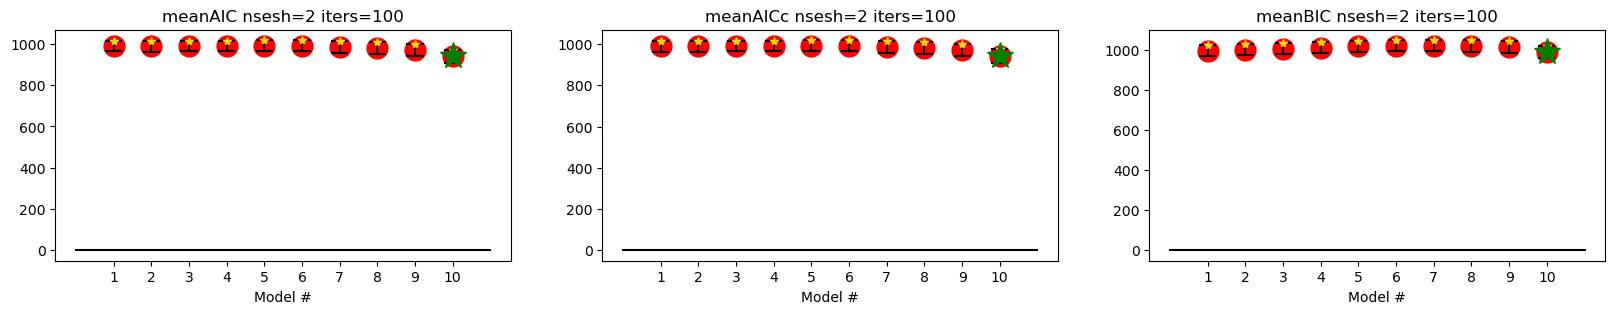

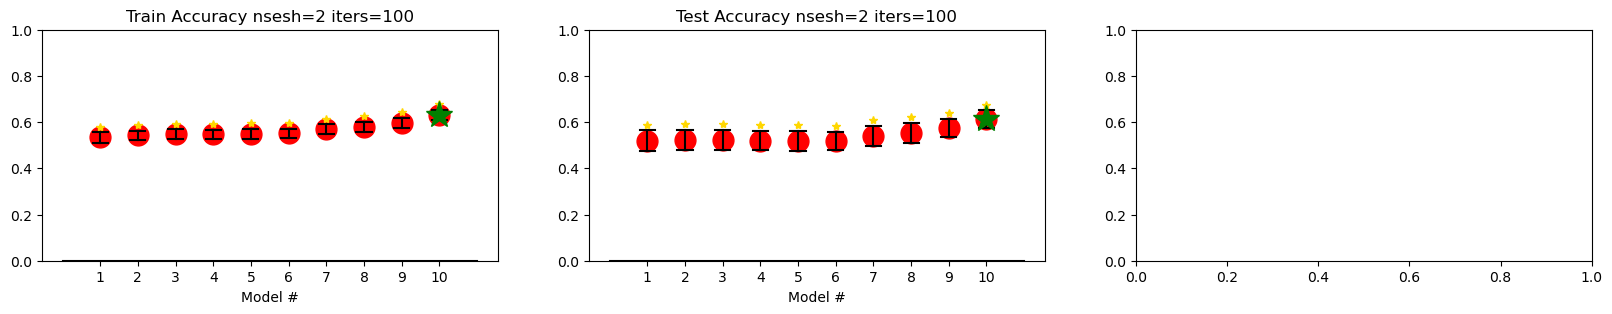

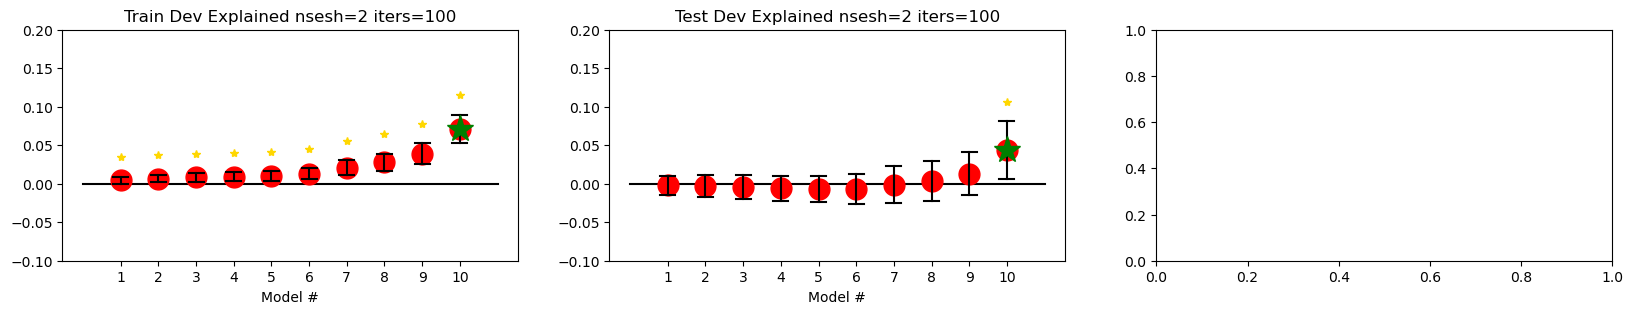

"     WARNING: using new combine_AICBIC_across_sessions2 that propagates error across sessions"


In [246]:
combine_AICBIC_across_sessions2(results, compositeSavePath, "0", "test")

In [178]:
sqrt(length([1,2,3]))

1.7320508075688772

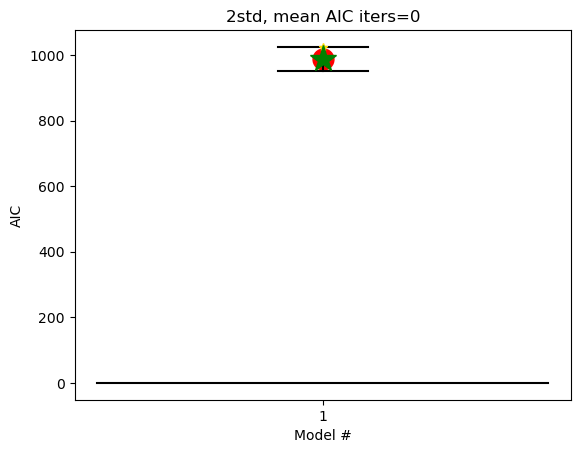

PyObject Text(0.5, 1.0, '2std, mean AIC iters=0')

In [232]:
compare_AICBIC([mean(results.results[1].AICcs[1])], [results.results[1].AICcs[1]]; yl="AIC", iters=0, ax=gca(), minmax="min")

In [194]:
results.results[1].AICcs[1]

100-element Array{Any,1}:
 838.663650082
 878.6412082857066
 896.6109093938
 901.0624687805783
 902.5229344317493
 903.3800278161182
 904.8845246164263
 907.7364283623358
 908.2201901783425
 909.4960421744752
 913.448877144507
 914.5127861255456
 915.961805594971
   ⋮
 968.586602237007
 969.3045327777634
 969.7943763724279
 969.8620410156979
 971.2464626832063
 971.6196817600705
 973.7949102692048
 973.9784184724706
 975.9318837681656
 976.3249405069877
 976.8073800639975
 979.2004988843028

In [252]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-03-02_2338) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl hazard_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

"     WARNING: Using new combine_th_across_sessions 3/2/2021"
Hx2s
Hx2s_1-6s
Hx2s_1-4s
Hx2s_1-2s
Hx2s_1s
Hx2s_-8s
Hx2s_-6s
Hx2s_-4s
Hx2s_-2s
Hx2s_-2s_DA
Figs saved to:/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Composite_B5fixTEST
"     WARNING: using new combine_AICBIC_across_sessions2 that propagates error across sessions"
meanAIC nsesh=2 iters=100 best=[941.5418711900392]
meanAICc nsesh=2 iters=100 best=[941.9178140275559]
meanBIC nsesh=2 iters=100 best=[991.8271965043216]
Train Accuracy nsesh=2 iters=100 best=[0.6312453952524186]
Test Accuracy nsesh=2 iters=100 best=[0.61295461691833]


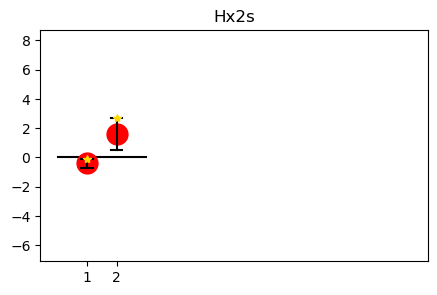

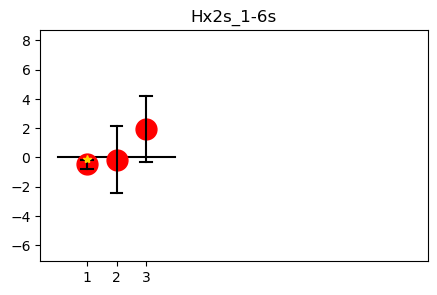

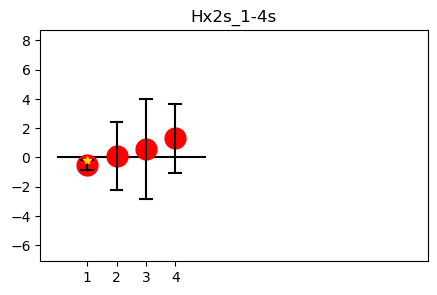

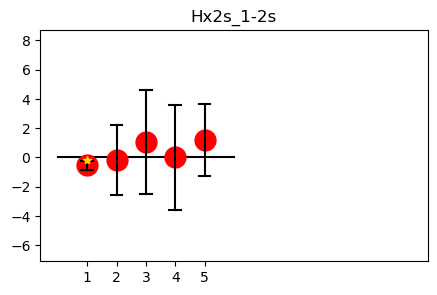

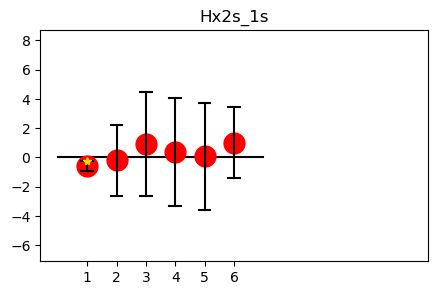

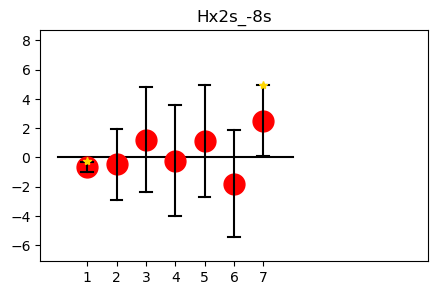

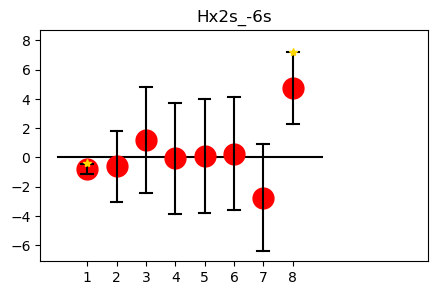

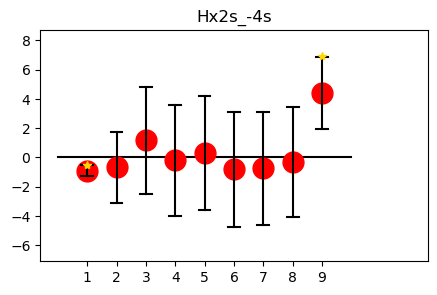

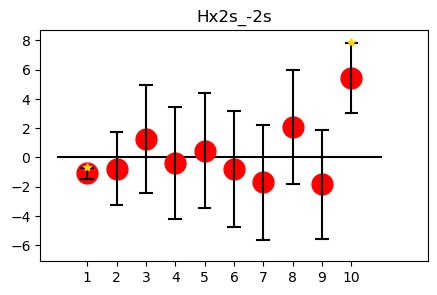

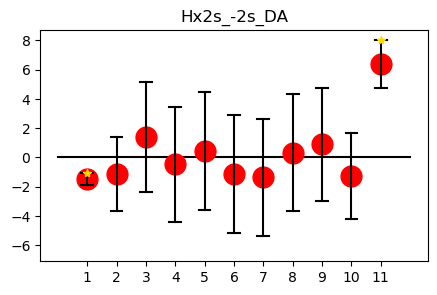

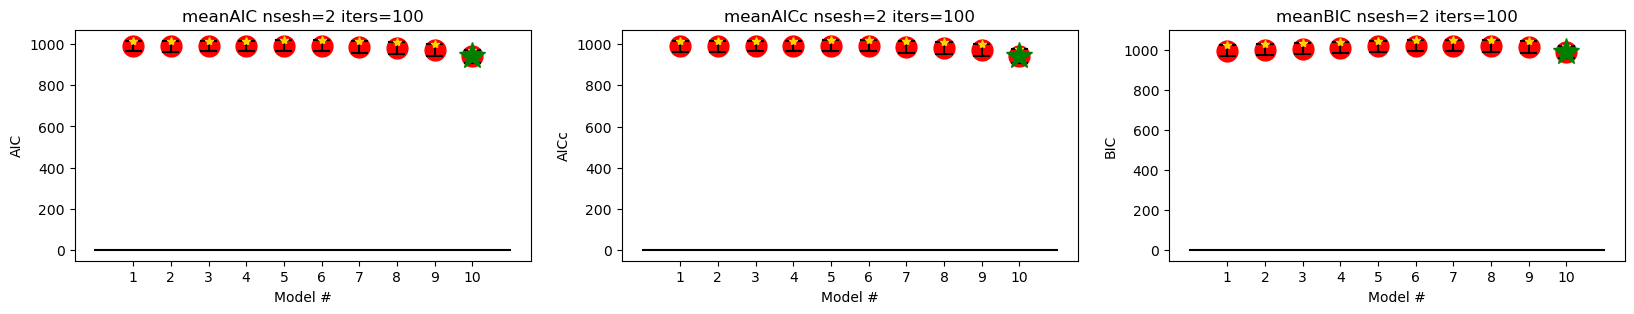

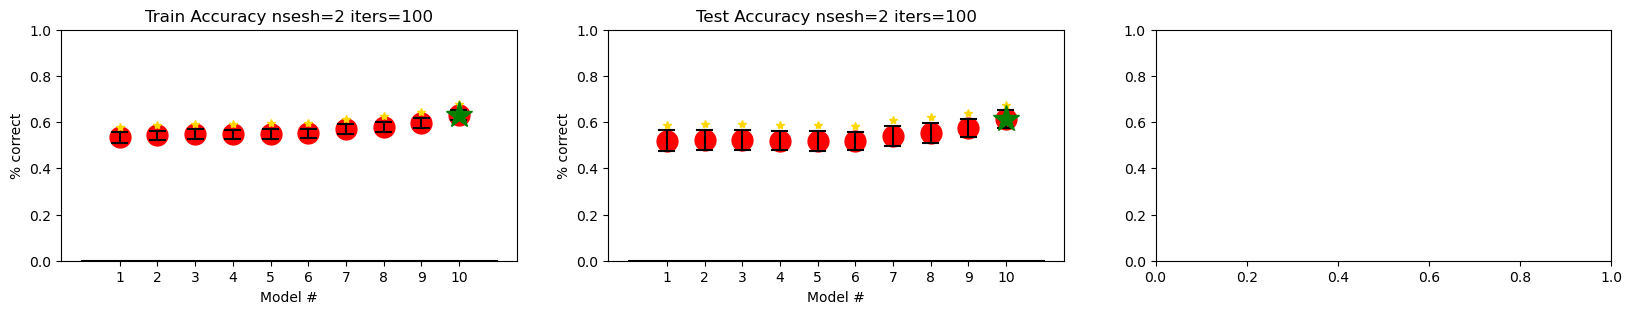

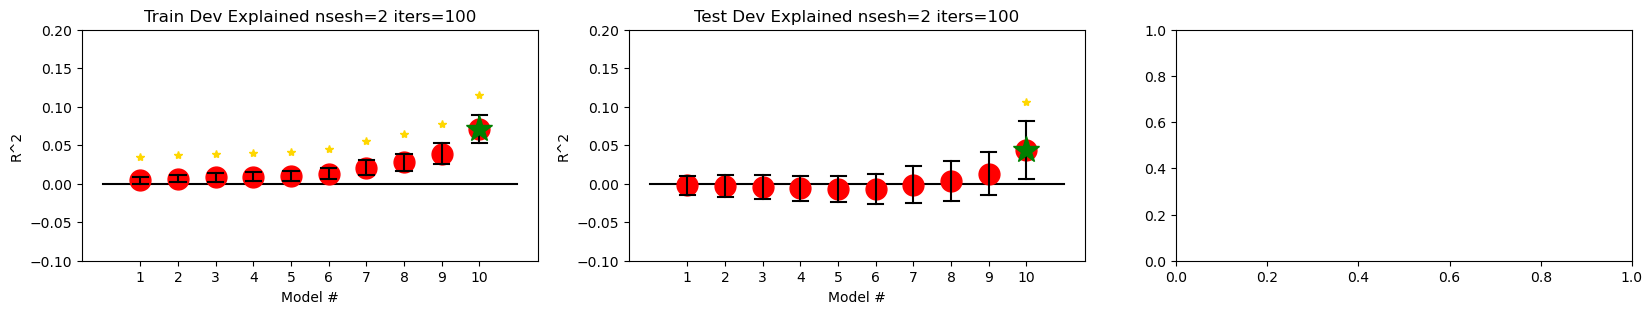

Train Dev Explained nsesh=2 iters=100 best=[0.07140365908593584]
Test Dev Explained nsesh=2 iters=100 best=[0.044216764241931786]


Nothing

In [253]:
bootlogit_postprocessingfunction1(results, compositeSavePath, modelpackagefunction; runID=0)

# Great, this is working well!

- We will select model by AIC/BIC (ideally will be consistent and tell us DA model is best
- Technically, this will be accomplished with the timeslice model -- so need to update those features NEXT TASK
- We will run the DA + Hx model and do post processing on all the sessions with these fxs (in prog Rig 1 3-2/3-2021)
- We will run the hazard stuff on that fit
    - Possibly want to write a bootstrapped CI function for the hazard fit.


In [254]:
cd("/Users/lilis/Documents/GitHub/HSOManalysisPackages/JuliaLanguage_Hierarchical_Models")
include(join([pwd(), "/function_library/file_modules.jl"]))
refresh_tools("function_library")

Refreshed (2021-03-03_0042) GLMNet_tools.jl auto_pull_matlabdatasets.jl cluster_modules.jl feedback_modules.jl file_modules.jl hazard_modules.jl math_modules.jl modeling_tools.jl plotting_tools.jl probabilistic_modules.jl 

-----------------------------------------------
	
"     WARNING: package version 3-3-2021 for use with updated error prop and hazard type analyses"
Initializing run_collated_model for nestlogit_allpred_200hxB5allNests
	
Found 2 sessions in /Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions:
1. b5_SNc_13
2. b5_SNc_13_2
	Using only a subset of these sessions:
b5_SNc_13
b5_SNc_13_2
	
-----------------------------------------------
Processing b5_SNc_13...(2021-03-03_0043)
      *---------- (1/2) 03/03/21 00:43:077
	
"     WARNING: package version 3-3-2021 for use with updated error prop and hazard type analyses"
truncating data back: -0.15s
"     WARNING: NB that we are normalizing history separate from in-trial dopamine..."
Downsampling the no-lick state => using 477=n, the number of first-licks
   *---------- (1/100) 03/03/21 00:43:832
   *=--------- (10/100) 03/03/21 00:44:221
   *==-------- (20/100) 03/03/21 00:44:629
***Po

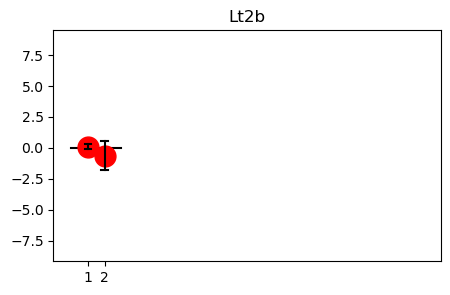

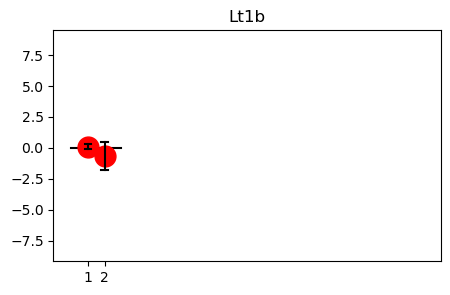

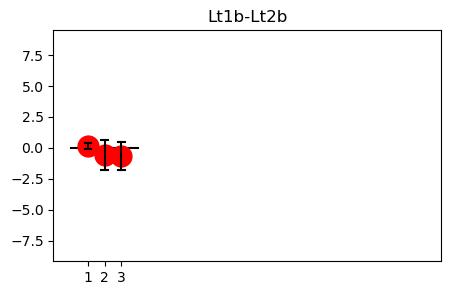

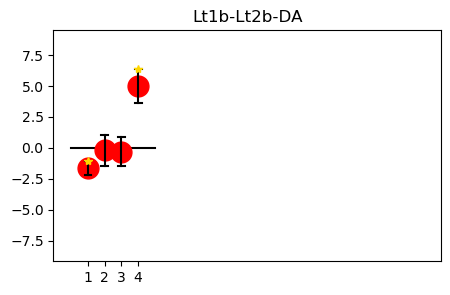

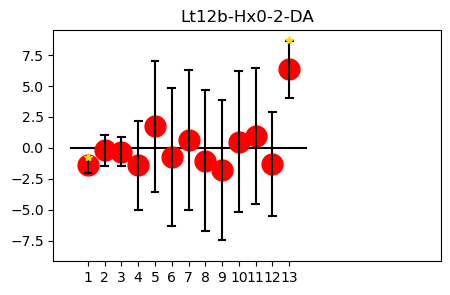

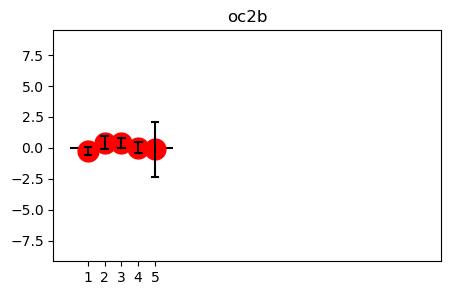

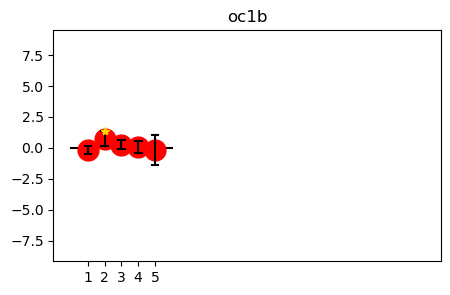

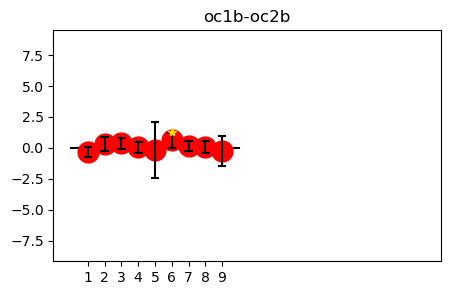

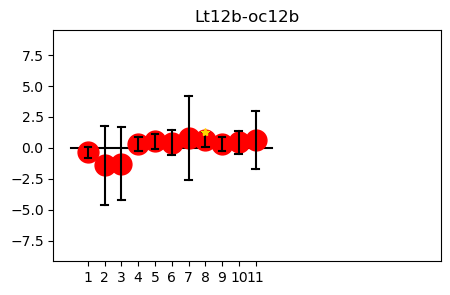

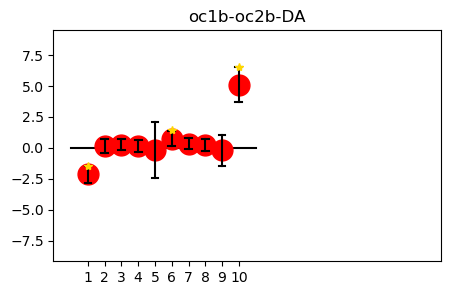

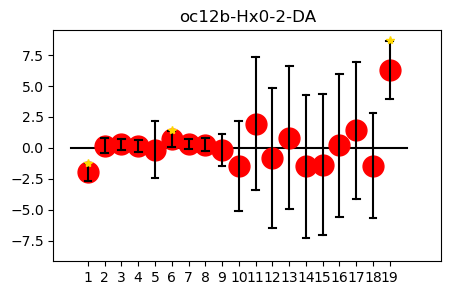

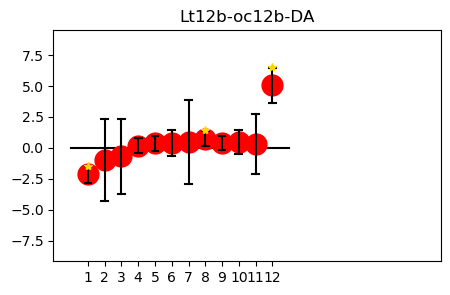

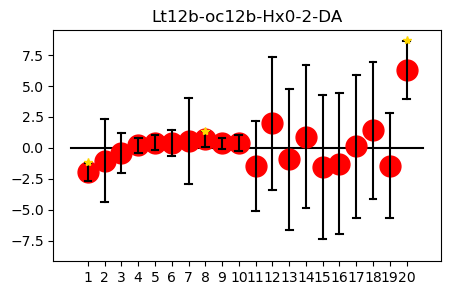

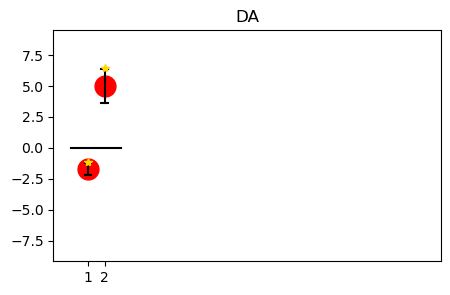

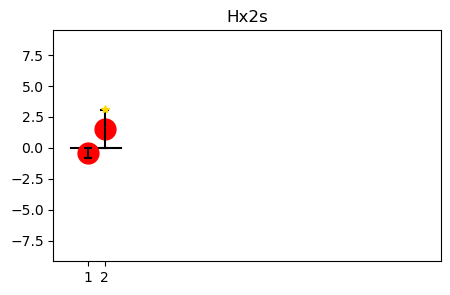

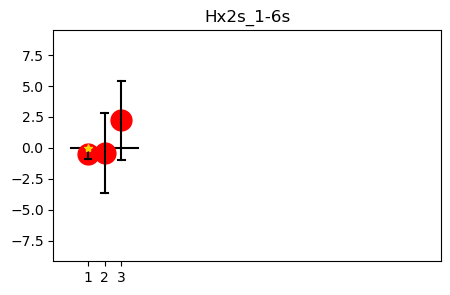

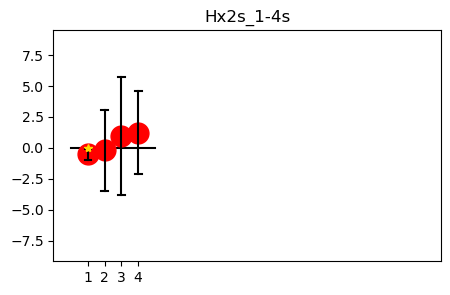

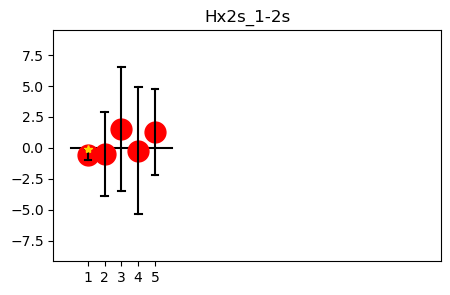

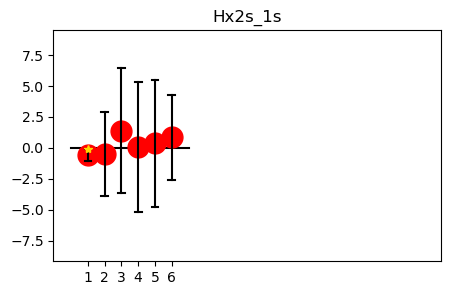

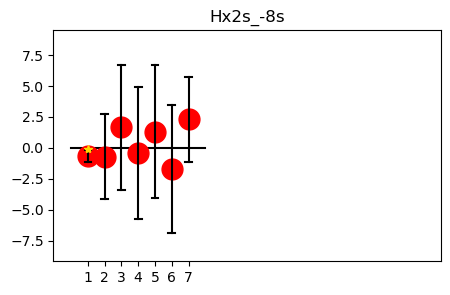

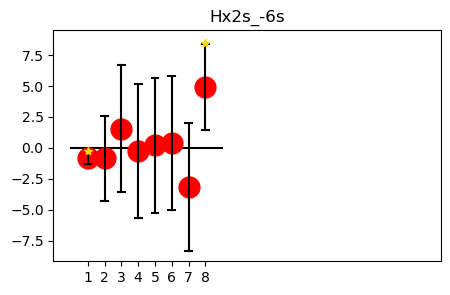

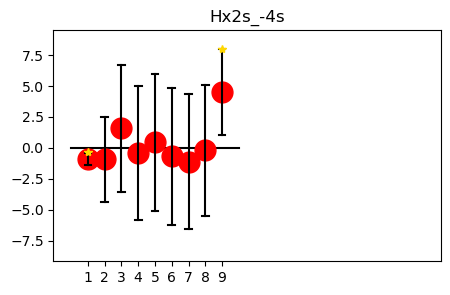

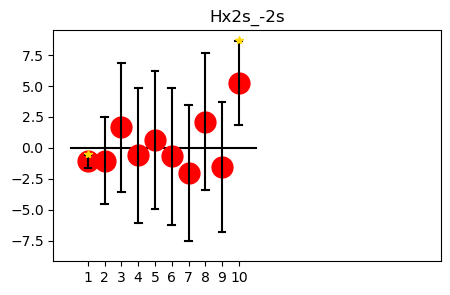

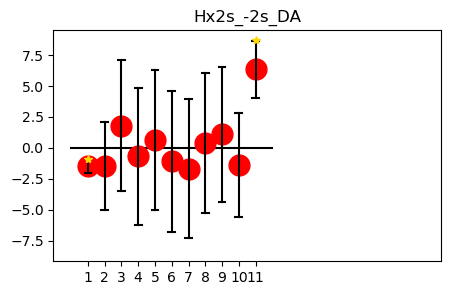

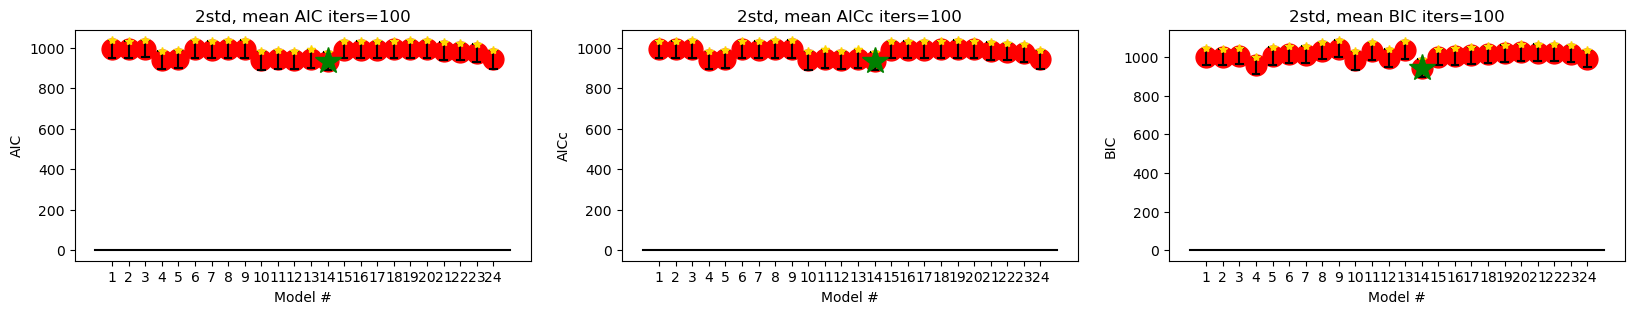

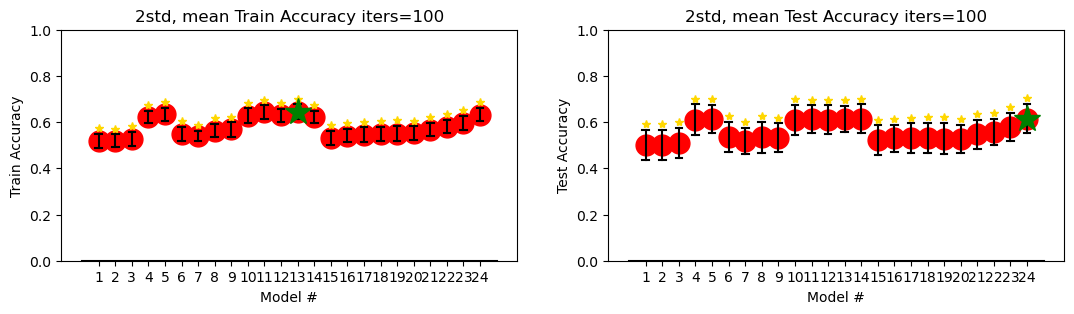

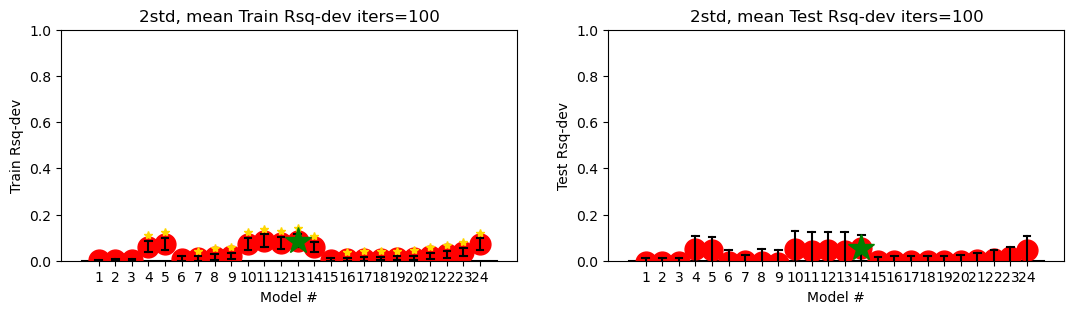

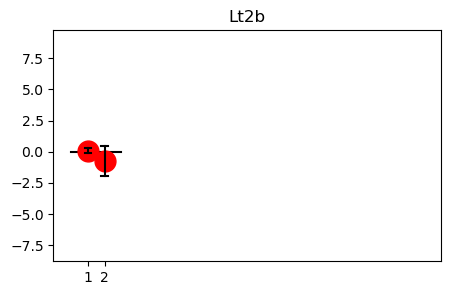

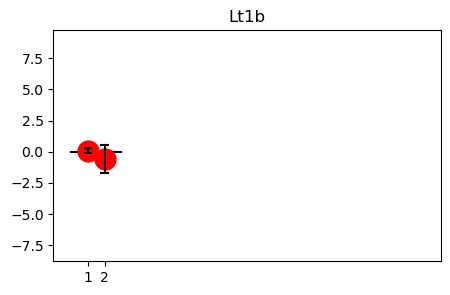

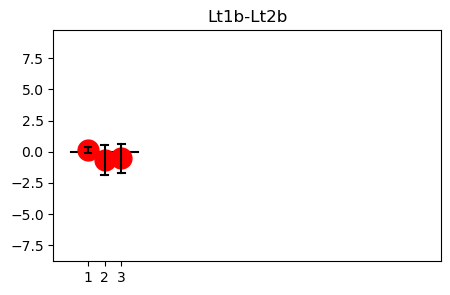

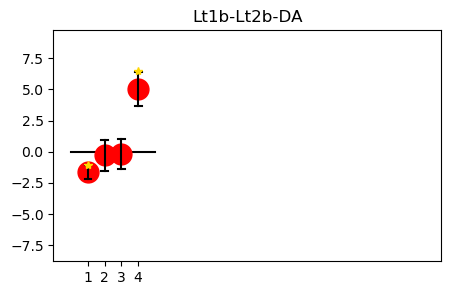

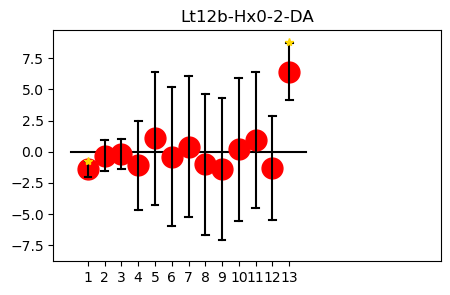

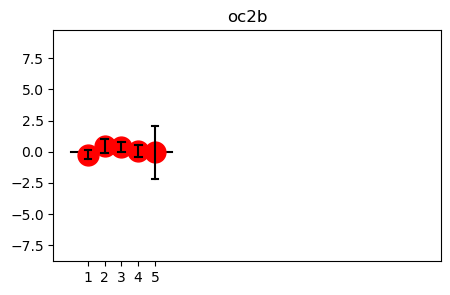

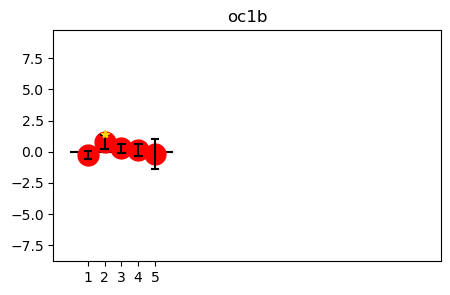

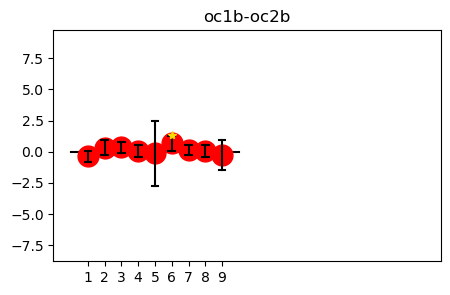

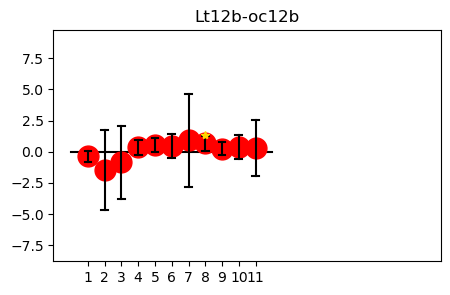

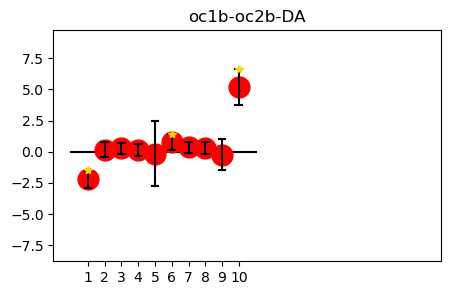

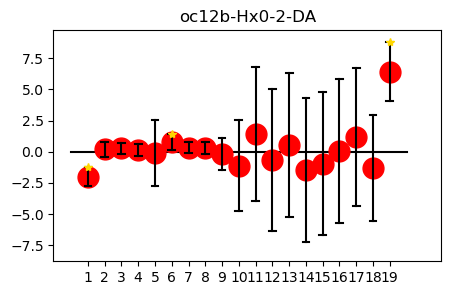

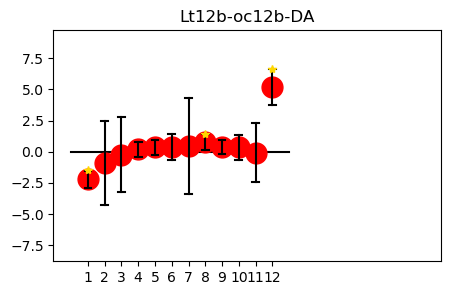

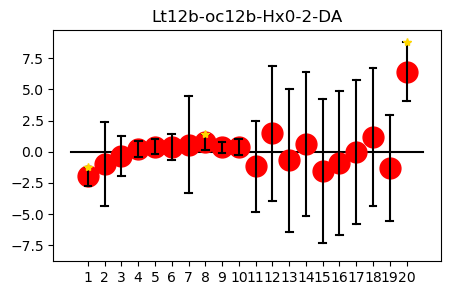

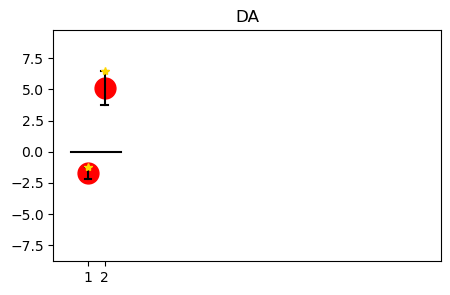

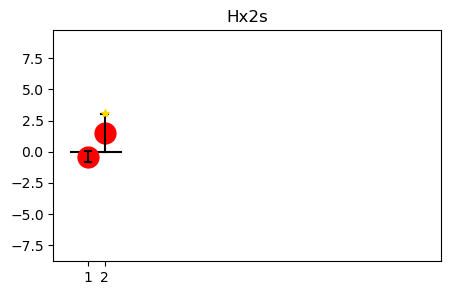

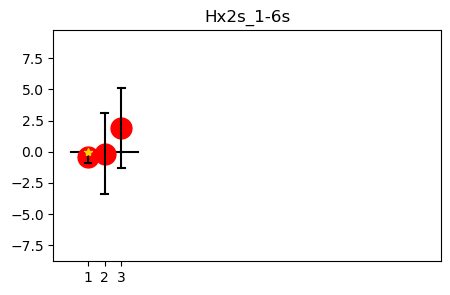

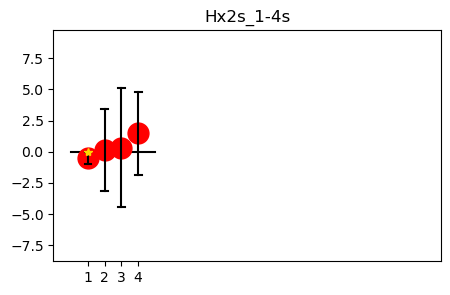

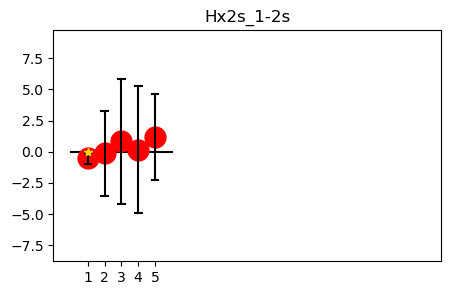

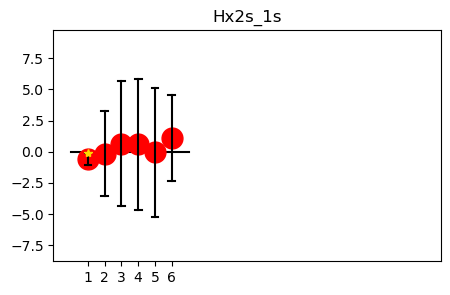

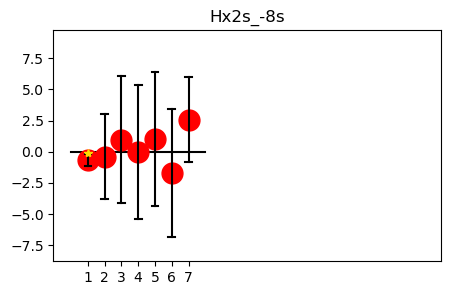

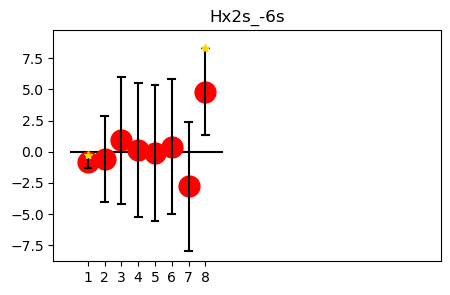

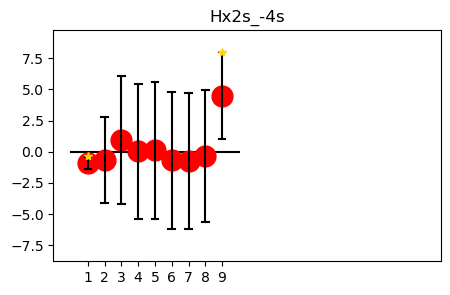

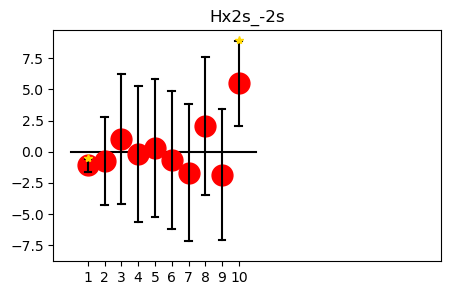

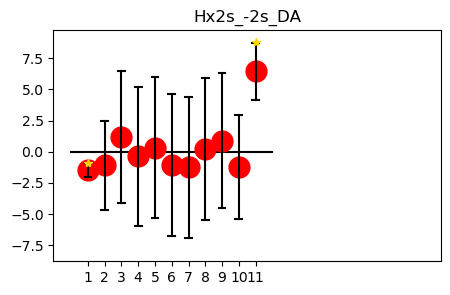

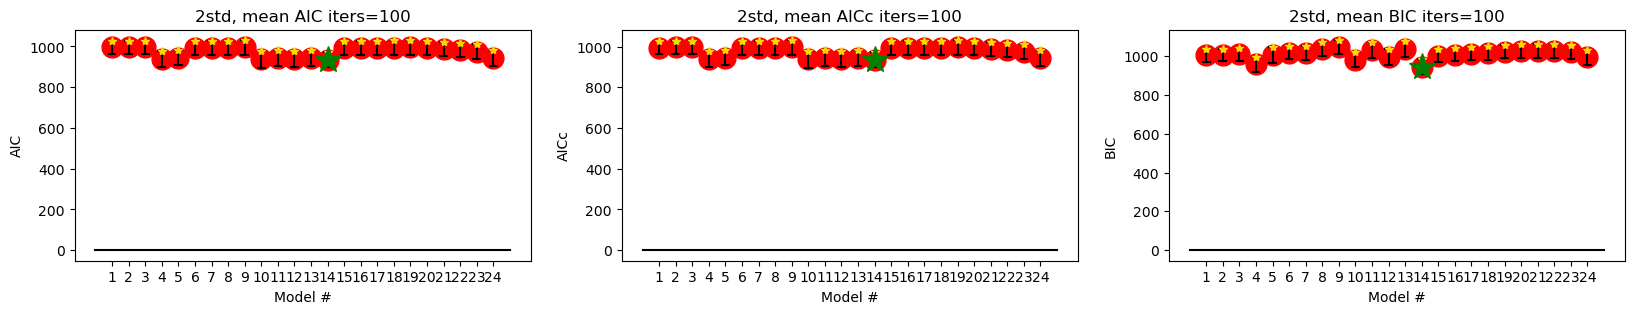

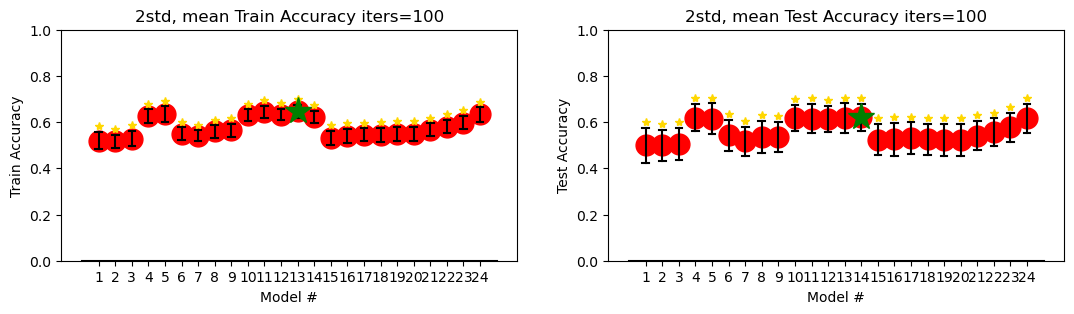

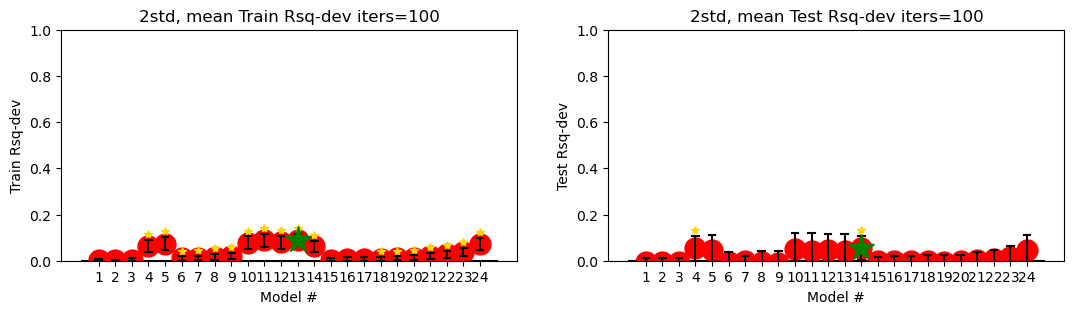


	
Completed procesing of 2 sessions. (2021-03-03_0044) ~
	
"     WARNING: package version 3-3-2021 for use with updated error prop and hazard type analyses"
	Find results in each sessions' folder in: nestlogit_allpred_200hxB5allNests
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions
	
Initiating post-modeling collation of results...
"     WARNING: package version 3-3-2021 for use with updated error prop and hazard type analyses"
	This is a template postprocessingfunction. To do work, you need to 
		implement what you want to collate from the results here!
Post-modeling collation of results complete and variables saved to:
/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Composite_B5_allNest3-3-21
	
-----------------------------------------------
	


In [255]:
runID = "B5allNests"
collatedPath = "/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/sessions"
compositeSavePath = "/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Composite_B5_allNest3-3-21"
modelpackagefunction = nestlogit_allpred_200hx_pkg#fullmodel_ocs_logit_200hx_pkg
postprocessingfunction = template_postprocessingfunction#bootlogit_timeslice_postprocessingfunction1

(fails2, results2,postprocessing2) = run_collated_model(collatedPath, modelpackagefunction; 
    pathIDx = 1:2,runFails=false, failDirs=[], 
    postprocessingfunction=postprocessingfunction,
    compositesavepath=compositeSavePath, runID=runID, suppressFigures=false); 



In [256]:
bootlogit_postprocessingfunction1(results2, compositeSavePath, modelpackagefunction; runID=0)

"     WARNING: package version 3-3-2021 for use with updated error prop and hazard type analyses"
"     WARNING: Using new combine_th_across_sessions 3/2/2021"
Lt2b
Lt1b
Lt1b-Lt2b
Lt1b-Lt2b-DA
Lt12b-Hx0-2-DA
oc2b
oc1b
oc1b-oc2b
Lt12b-oc12b
oc1b-oc2b-DA
oc12b-Hx0-2-DA
Lt12b-oc12b-DA
Lt12b-oc12b-Hx0-2-DA
DA
Hx2s
Hx2s_1-6s
Hx2s_1-4s
Hx2s_1-2s
Hx2s_1s
Hx2s_-8s
Hx2s_-6s
Hx2s_-4s
Hx2s_-2s
Hx2s_-2s_DA
Figs saved to:/Users/lilis/Dropbox (MIT)/1 ASSAD LAB/testFiles/testHOST/sessionHOST/CSVfigures/collatedCSV_doubleb5d13/Composite_B5_allNest3-3-21
"     WARNING: using new combine_AICBIC_across_sessions2 that propagates error across sessions"


LoadError: BoundsError: attempt to access 10-element Array{Any,1} at index [11]